In [83]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from simple_convnet import SimpleConvNet
%matplotlib inline

from common.functions import softmax

In [84]:
# データの読み込み
(x_train, t_train), (x_test, t_test) = mnist.load_data()

In [85]:
x_img = x_test[0]
x_label = t_test[0]

<function matplotlib.pyplot.show(*args, **kw)>

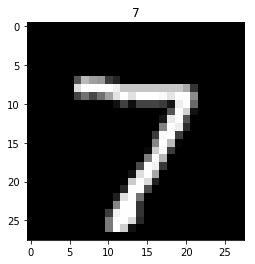

In [86]:
plt.imshow(x_img, 'gray')
plt.title(x_label)
plt.show

In [87]:
network = SimpleConvNet(input_dim=(1,28,28),
                        conv_param = {'filter_num': 30, 'filter_size': 3, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)

In [88]:
network.load_params("params_20.pkl")

In [89]:
x_img = x_img.reshape(-1, 1, 28, 28)
pred = network.predict(x_img)
pred_probability = softmax(pred)
pred_probability

array([[3.36049504e-08, 1.40437832e-07, 1.11512805e-05, 8.01524005e-07,
        6.37050857e-11, 8.75920846e-09, 8.89795146e-12, 9.99987250e-01,
        5.91371920e-07, 2.28143177e-08]])

In [90]:
pred_label = np.argmax(pred, axis=1)
pred_label

array([7])

99.998%信頼で「７」に分類する

In [91]:
x_base = x_img.copy()

In [ ]:
def delete_px(base):

    pred_loss_list = []
    loss_xy = []
    
    base_pred = softmax(network.predict(base))
    base_label = np.argmax(base_pred)
    base_score = base_pred[0, base_label]
    
    print("base_label", base_label)
    print("base_score", base_score)
    plt.imshow(base.reshape(28, 28))
    plt.title("base")
    plt.show()
    plt.cla()
    
    
    for y in range(28):
        for x in range(28):
            if not base[0,0,y,x] == 0:
                buf = base.copy()
                buf[0,0,y,x] = 0
                pred_buf = softmax(network.predict(buf))
                pred_loss_list.append(pred_buf[0, base_label])
                loss_xy.append([x, y])

    
    plt.plot(np.arange(len(pred_loss_list)), pred_loss_list)
    plt.xlabel("pxs")
    plt.ylabel("score")
    plt.show()
    plt.cla()

    min_idx = np.argmin(pred_loss_list)
    min_score = pred_loss_list[min_idx]
    print("min_score", min_score)
    min_x, min_y = loss_xy[min_idx]
    print("x, y", min_x, min_y)

    img = base.copy()
    img[0,0,min_y,min_x] = 0
    plt.imshow(img.reshape(28, 28))
    plt.title("min")
    plt.show()
    
    return img


In [ ]:
delete_px_1 = delete_px(x_base)

In [ ]:
delete_px_2 = delete_px(delete_px_1)

In [ ]:
def add_px(base):

    pred_loss_list = []
    loss_xy = []
    
    base_pred = softmax(network.predict(base))
    base_label = np.argmax(base_pred)
    base_score = base_pred[0, base_label]
    
    print("base_label", base_label)
    print("base_score", base_score)
    plt.imshow(base.reshape(28, 28))
    plt.title("base")
    plt.show()
    plt.cla()
    
    
    for y in range(28):
        for x in range(28):
            if base[0,0,y,x] == 0:
                buf = base.copy()
                buf[0,0,y,x] = 255
                pred_buf = softmax(network.predict(buf))
                pred_loss_list.append(pred_buf[0, base_label])
                loss_xy.append([x, y])

    
    plt.plot(np.arange(len(pred_loss_list)), pred_loss_list)
    plt.xlabel("pxs")
    plt.ylabel("score")
    plt.show()
    plt.cla()

    min_idx = np.argmin(pred_loss_list)
    min_score = pred_loss_list[min_idx]
    print("min_score", min_score)
    min_x, min_y = loss_xy[min_idx]
    print("x, y", min_x, min_y)

    img = base.copy()
    img[0,0,min_y,min_x] = 255
    plt.imshow(img.reshape(28, 28))
    plt.title("min")
    plt.show()
    
    return img


In [ ]:
add_px_1 = add_px(x_base)

In [ ]:
add_px_2 = add_px(add_px_1)

1px消し　＋　1px足す

In [ ]:
plt.imshow(x_base.reshape(28, 28))
plt.title("base")
plt.show()
plt.cla()

base_pred = softmax(network.predict(x_base))
base_label = np.argmax(base_pred)
base_score = base_pred[0, base_label]

print("base_label", base_label)
print("base_score", base_score)


del_1_add_1_img = x_base.copy()
del_1_add_1_img[0,0,16,17] = 0
del_1_add_1_img[0,0,23,19] = 255
plt.imshow(del_1_add_1_img.reshape(28, 28))
plt.title("del_1_add_1")
plt.show()

pred_del_1_add_1 = softmax(network.predict(del_1_add_1_img))
pred_del_1_add_1_label = np.argmax(pred_del_1_add_1)
pred_del_1_add_1_score = pred_del_1_add_1[0, pred_del_1_add_1_label]

print(pred_del_1_add_1_label)
print(pred_del_1_add_1_score)

del_2_add_2_img = del_1_add_1_img.copy()
del_2_add_2_img[0,0,9,17] = 0
del_2_add_2_img[0,0,23,18] = 255
plt.imshow(del_2_add_2_img.reshape(28, 28))
plt.title("del_2_add_2")
plt.show()

pred_del_2_add_2 = softmax(network.predict(del_2_add_2_img))
pred_del_2_add_2_label = np.argmax(pred_del_2_add_2)
pred_del_2_add_2_score = pred_del_2_add_2[0, pred_del_2_add_2_label]

print(pred_del_2_add_2_label)
print(pred_del_2_add_2_score)

In [30]:
def add_other_px(base):

    pred_loss_list = []
    loss_xyc = []
    
    base_pred = softmax(network.predict(base))
    base_label = np.argmax(base_pred)
    base_score = base_pred[0, base_label]
    
    print("base_label", base_label)
    print("base_score", base_score)
    plt.imshow(base.reshape(28, 28))
    plt.title("base")
    plt.show()
    plt.cla()
    
    
    for y in range(28):
        for x in range(28):
            for c in range(256):
                buf = base.copy()
                buf[0,0,y,x] = c
                pred_buf = softmax(network.predict(buf))
                pred_loss_list.append(pred_buf[0, base_label])
                loss_xyc.append([x, y, c])

    
    plt.plot(np.arange(len(pred_loss_list)), pred_loss_list)
    plt.xlabel("pxs")
    plt.ylabel("score")
    plt.show()
    plt.cla()

    min_idx = np.argmin(pred_loss_list)
    min_score = pred_loss_list[min_idx]
    print("min_score", min_score)
    min_x, min_y, min_c = loss_xyc[min_idx]
    print("x, y, c", min_x, min_y, min_c)

    img = base.copy()
    img[0,0,min_y,min_x] = min_c
    plt.imshow(img.reshape(28, 28))
    plt.title("min")
    plt.show()
    
    return loss_xyc[min_idx], img


In [ ]:
all_1 = add_other_px(x_base)

In [ ]:
all_2 = add_other_px(all_1)

In [31]:
def down_score(base, score):
    base_pred = softmax(network.predict(base))
    base_label = np.argmax(base_pred)
    down_score = base_pred[0, base_label]
    
    xyc_list = []
    
    i = 1
    
    while down_score > score:
        print(i)
        xyc, down = add_other_px(base)
        down_pred = softmax(network.predict(down))
        down_label = np.argmax(down_pred)
        down_score = base_pred[0, down_label]
        base = down
        xyc_list.append(xyc)
        i += 1
        
    return xyc_list
        

1
base_label 7
base_score 0.9999872501346297


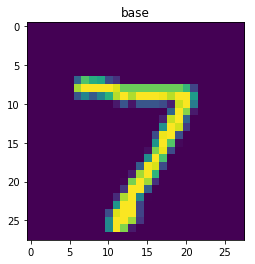

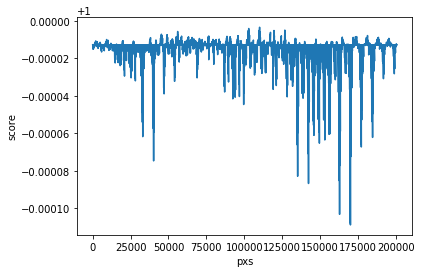

min_score 0.9998912163515389
x, y, c 19 23 255


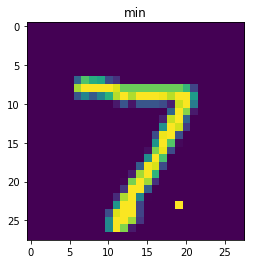

2
base_label 7
base_score 0.9998912163515389


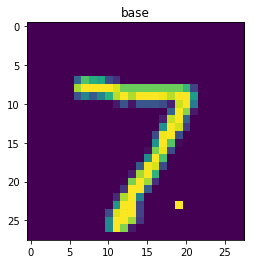

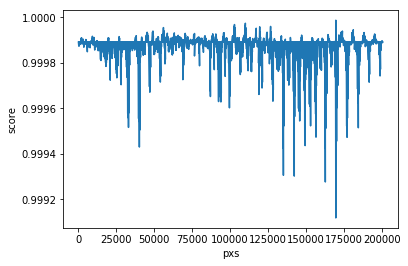

min_score 0.9991186887534407
x, y, c 18 23 255


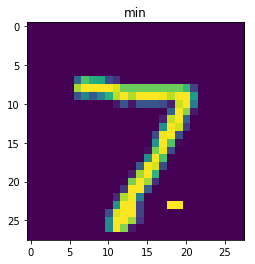

3
base_label 7
base_score 0.9991186887534407


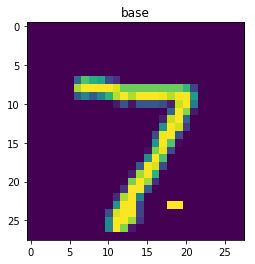

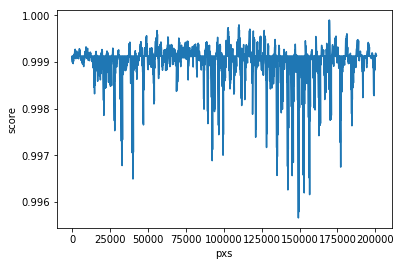

min_score 0.995655859920171
x, y, c 22 20 255


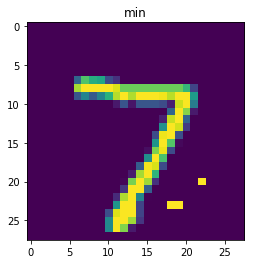

4
base_label 7
base_score 0.995655859920171


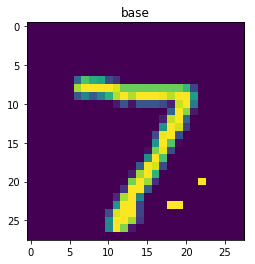

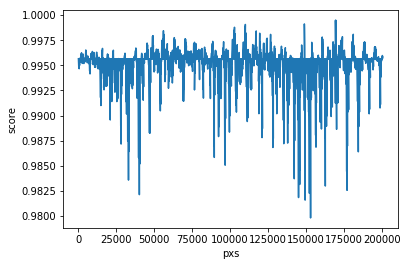

min_score 0.9798046332931245
x, y, c 9 21 255


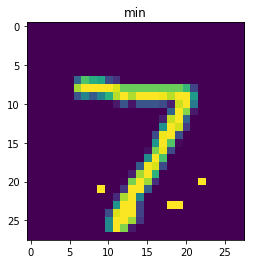

5
base_label 7
base_score 0.9798046332931245


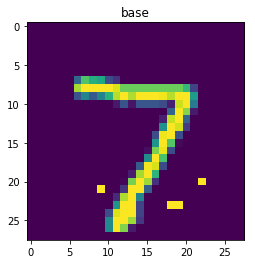

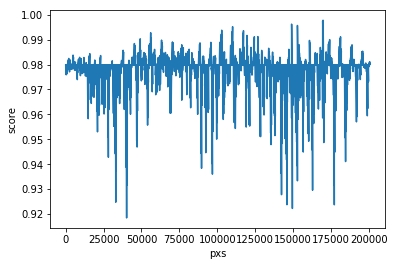

min_score 0.9184430060997975
x, y, c 16 5 255


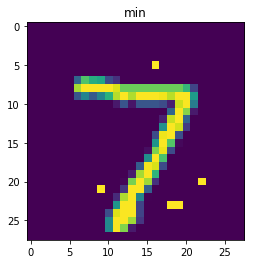

6
base_label 7
base_score 0.9184430060997975


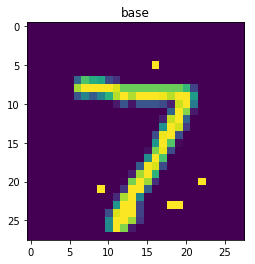

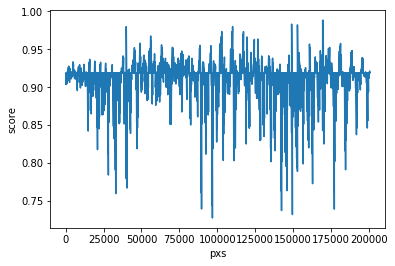

min_score 0.7277295365920897
x, y, c 13 13 255


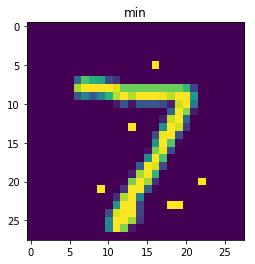

7
base_label 7
base_score 0.7277295365920897


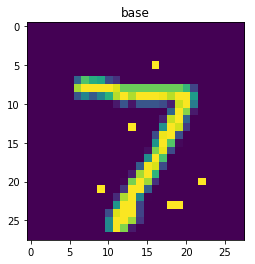

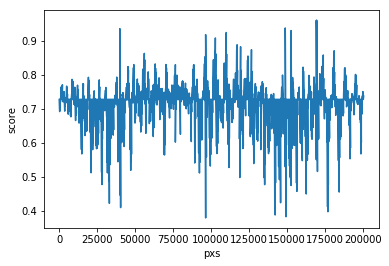

min_score 0.379341512155857
x, y, c 12 13 255


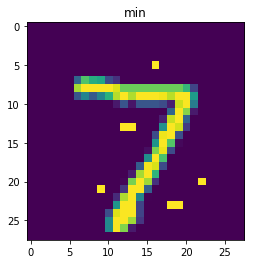

In [32]:
d = down_score(x_base, 0.9)

In [33]:
print("END")

END


In [34]:
d

[[19, 23, 255],
 [18, 23, 255],
 [22, 20, 255],
 [9, 21, 255],
 [16, 5, 255],
 [13, 13, 255],
 [12, 13, 255]]

In [35]:
corner_img = x_base.copy()

In [36]:
corner_img.shape

(1, 1, 28, 28)

In [37]:
d

[[19, 23, 255],
 [18, 23, 255],
 [22, 20, 255],
 [9, 21, 255],
 [16, 5, 255],
 [13, 13, 255],
 [12, 13, 255]]

In [38]:
def edit_img(base, li):
    img = base.copy()
    for x,y,c in li:
        img[0,0,y,x] = c
        
    return img

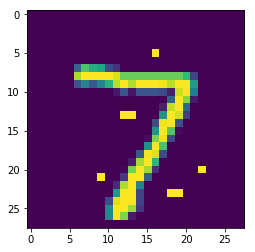

In [39]:
edited7_img = edit_img(x_base, d)
plt.imshow(edited7_img.reshape(28, 28))
plt.show()

In [47]:
edited7_pred = softmax(network.predict(edited7_img))
print(edited7_pred)
edited7_label = np.argmax(edited7_pred)
print(edited7_label)
edited7_score = edited7_pred[0, edited7_label]
print(edited7_score)

[[4.35269236e-05 1.12006724e-04 5.73702749e-01 3.73143700e-02
  1.14036130e-08 2.02560956e-05 2.55520194e-09 3.79341512e-01
  9.39890808e-03 6.66565963e-05]]
2
0.573702749496125


In [92]:
def min_delete_px(base):

    base_pred = softmax(network.predict(base))
    base_label = np.argmax(base_pred)
    base_score = base_pred[0, base_label]
    
    print("base_label", base_label)
    print("base_score", base_score)
    plt.imshow(base.reshape(28, 28))
    plt.title("base")
    plt.show()
    plt.cla()

    pred_loss_list = []
    pred_list = []
    loss_xy = []
        
    for y in range(28):
        for x in range(28):
            if not base[0,0,y,x] == 0:
                buf = base.copy()
                buf[0,0,y,x] = 0
                pred_buf = softmax(network.predict(buf))
                pred_loss_list.append(pred_buf[0, base_label])
                pred_list.append(pred_buf)
                loss_xy.append([x, y])

    
    plt.plot(np.arange(len(pred_loss_list)), pred_loss_list)
    plt.xlabel("pxs")
    plt.ylabel("score")
    plt.show()
    plt.cla()

    max_idx = np.argmax(pred_loss_list)
    max_score = pred_loss_list[max_idx]
    print("max_score", max_score)
    max_x, max_y = loss_xy[max_idx]
    print("x, y", max_x, max_y)
    
    print("pred", pred_list[max_idx])

    img = base.copy()
    img[0,0,max_y,max_x] = 0
    plt.imshow(img.reshape(28, 28))
    plt.title("max")
    plt.show()
    
    return loss_xy[max_idx], img


base_label 7
base_score 0.9999872501346297


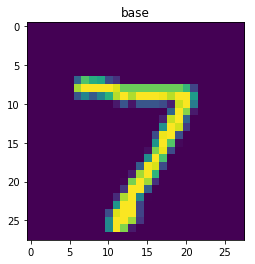

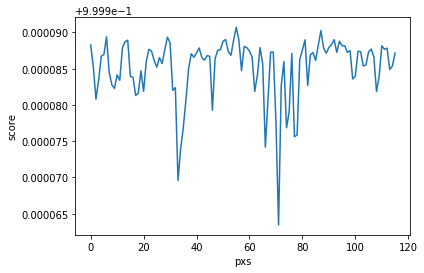

max_score 0.9999907142665387
x, y 19 12
pred [[1.76712354e-08 1.76823203e-07 7.51639809e-06 9.21438476e-07
  3.28239860e-11 2.09546200e-08 1.34909155e-11 9.99990714e-01
  6.19665784e-07 1.27357340e-08]]


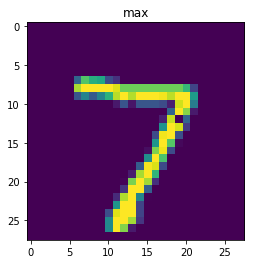

([19, 12],
 array([[[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
             0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
             0,   0,   0,   0],
          [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
             0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
             0,   0,   0,   0],
          [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
             0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
             0,   0,   0,   0],
          [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
             0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
             0,   0,   0,   0],
          [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
             0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
             0,   0,   0,   0],
          [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
             0,   0,   0,   0,   0,   0,   0,   

In [93]:
min_delete_px(x_base)

In [94]:
def find_min_tar(base, target):
    i = 1
    
    p_list = []
    
    img_label = target
    
    img = base
    
    while img_label == target:
        print(i)
        i+=1
        p, img = min_delete_px(img)
        pred_img = softmax(network.predict(img))
        img_label = np.argmax(pred_img)
        
        if img_label == target:
            p_list.append(p)
        
        
    for x, y in p_list:
        base[0,0,y,x] = 0
        
    return p_list

1
base_label 7
base_score 0.9999872501346297


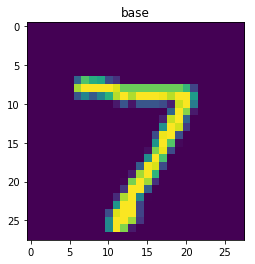

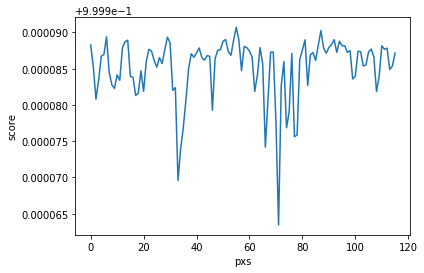

max_score 0.9999907142665387
x, y 19 12
pred [[1.76712354e-08 1.76823203e-07 7.51639809e-06 9.21438476e-07
  3.28239860e-11 2.09546200e-08 1.34909155e-11 9.99990714e-01
  6.19665784e-07 1.27357340e-08]]


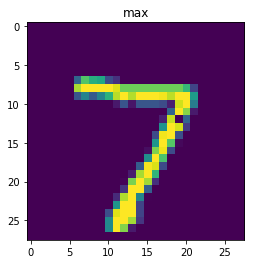

2
base_label 7
base_score 0.9999907142665387


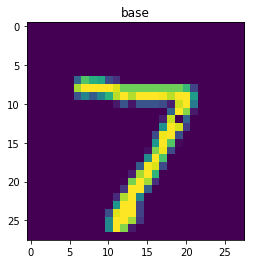

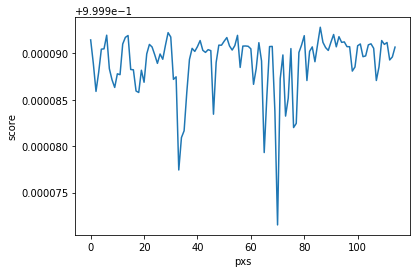

max_score 0.9999928088239102
x, y 15 20
pred [[1.84662820e-08 1.72289297e-07 5.32533124e-06 8.05653189e-07
  3.95719327e-11 1.98856341e-08 1.59848394e-11 9.99992809e-01
  8.32697496e-07 1.67973917e-08]]


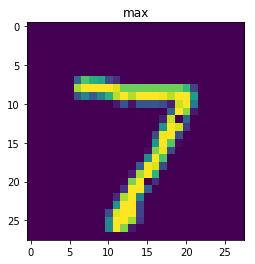

3
base_label 7
base_score 0.9999928088239102


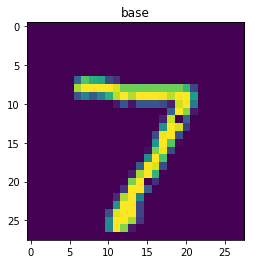

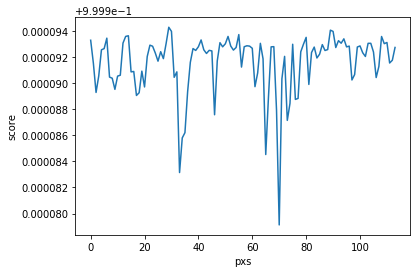

max_score 0.9999943235189404
x, y 13 9
pred [[1.93567234e-08 1.61081236e-07 4.27300837e-06 5.41899716e-07
  9.82137285e-11 1.36288826e-08 2.13984476e-11 9.99994324e-01
  6.49177255e-07 1.82092677e-08]]


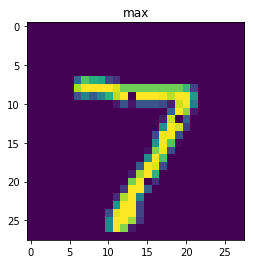

4
base_label 7
base_score 0.9999943235189404


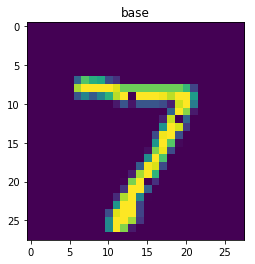

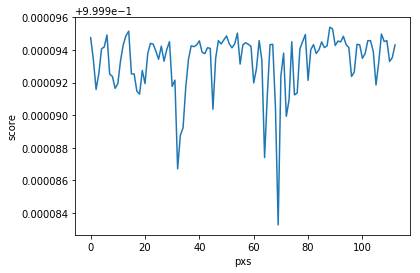

max_score 0.9999953950457554
x, y 14 21
pred [[1.45873870e-08 1.42850696e-07 3.09202988e-06 4.71581220e-07
  1.30537359e-10 1.15450790e-08 1.88019281e-11 9.99995395e-01
  8.51611951e-07 2.05986876e-08]]


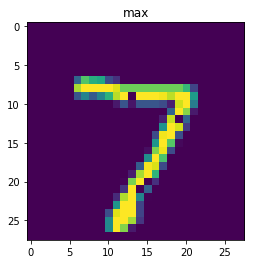

5
base_label 7
base_score 0.9999953950457554


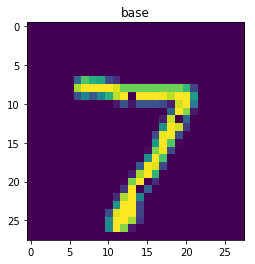

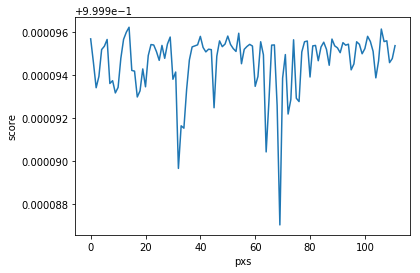

max_score 0.9999962303130812
x, y 14 8
pred [[1.27868427e-08 1.00673295e-07 2.52151369e-06 3.88927759e-07
  2.84284682e-10 8.58816709e-09 2.05024259e-11 9.99996230e-01
  7.14480171e-07 2.24122089e-08]]


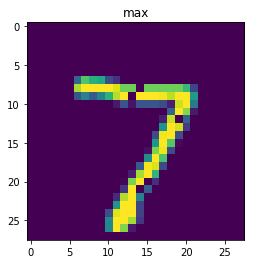

6
base_label 7
base_score 0.9999962303130812


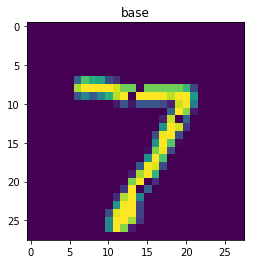

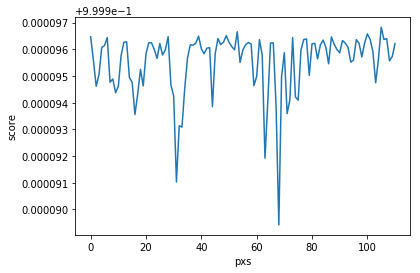

max_score 0.9999968251311012
x, y 13 25
pred [[1.37874705e-08 8.87830246e-08 2.37949552e-06 2.16447911e-07
  3.38045205e-10 4.73064061e-09 1.90280419e-11 9.99996825e-01
  4.50644375e-07 2.06228825e-08]]


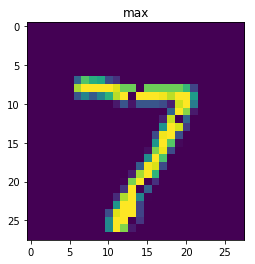

7
base_label 7
base_score 0.9999968251311012


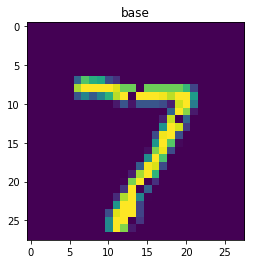

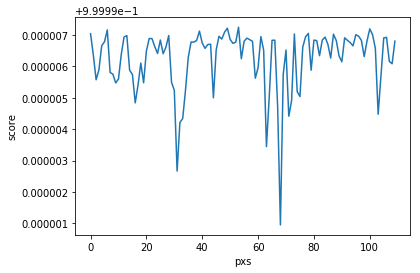

max_score 0.9999972428532358
x, y 20 12
pred [[1.11500405e-08 9.40453896e-08 1.95359555e-06 2.13163640e-07
  2.89065709e-10 5.64323041e-09 1.91436983e-11 9.99997243e-01
  4.61774383e-07 1.74663165e-08]]


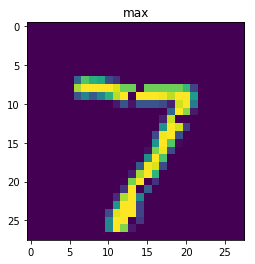

8
base_label 7
base_score 0.9999972428532358


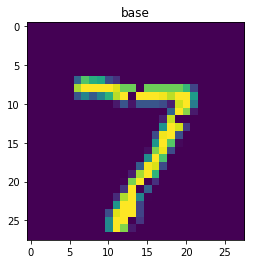

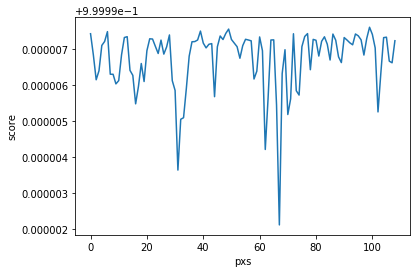

max_score 0.9999975985006806
x, y 13 24
pred [[9.03453391e-09 7.06549298e-08 1.88470341e-06 1.35431868e-07
  2.64564511e-10 2.73102546e-09 1.44626426e-11 9.99997599e-01
  2.79993337e-07 1.86711892e-08]]


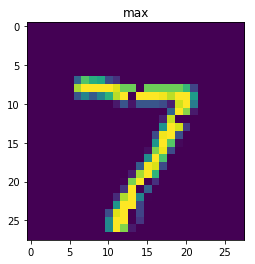

9
base_label 7
base_score 0.9999975985006806


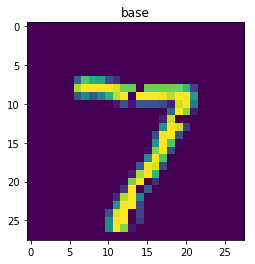

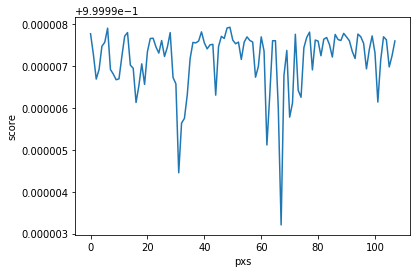

max_score 0.9999979228293959
x, y 20 11
pred [[7.83531177e-09 9.52494057e-08 1.46540644e-06 1.80337332e-07
  2.26217739e-10 5.40356855e-09 1.91424444e-11 9.99997923e-01
  3.03825177e-07 1.88680111e-08]]


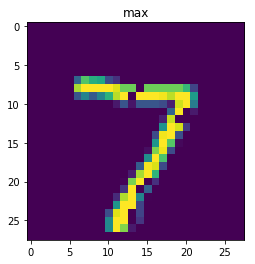

10
base_label 7
base_score 0.9999979228293959


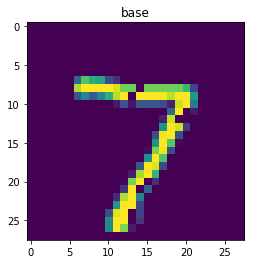

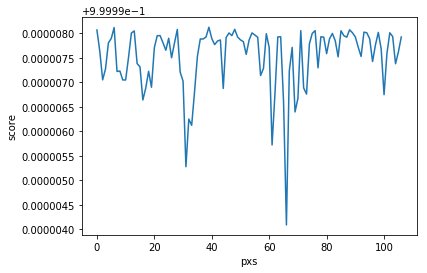

max_score 0.9999981215372852
x, y 14 10
pred [[6.46917772e-09 8.45140820e-08 1.38610993e-06 1.35091254e-07
  2.25660642e-10 4.09232610e-09 1.72484532e-11 9.99998122e-01
  2.47049475e-07 1.48935620e-08]]


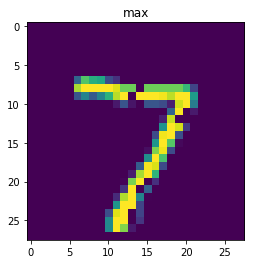

11
base_label 7
base_score 0.9999981215372852


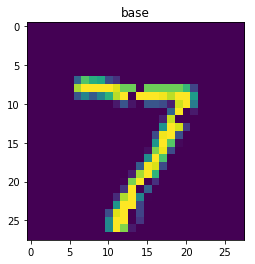

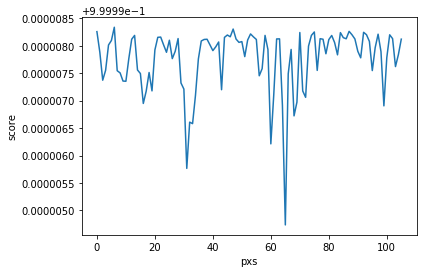

max_score 0.9999983363015387
x, y 6 8
pred [[7.93305505e-09 8.05310059e-08 1.04152165e-06 1.66274677e-07
  3.70001429e-10 8.16207479e-09 2.30491239e-11 9.99998336e-01
  3.33990764e-07 2.48921883e-08]]


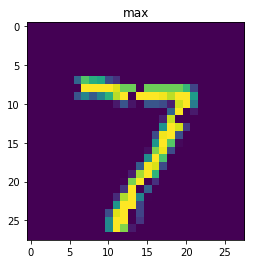

12
base_label 7
base_score 0.9999983363015387


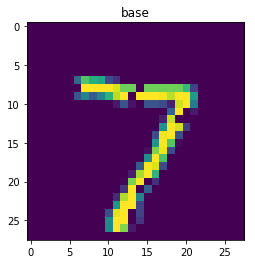

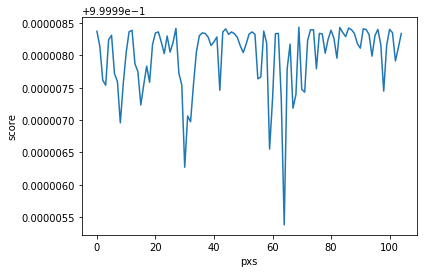

max_score 0.9999984359400129
x, y 14 18
pred [[8.98912313e-09 7.61904396e-08 9.69910611e-07 1.57769180e-07
  3.65733816e-10 8.16856815e-09 2.38701463e-11 9.99998436e-01
  3.15322094e-07 2.73203680e-08]]


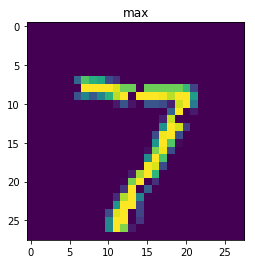

13
base_label 7
base_score 0.9999984359400129


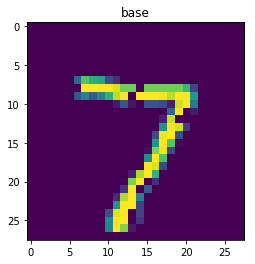

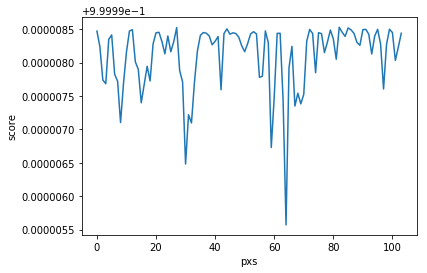

max_score 0.9999985283017713
x, y 15 21
pred [[8.27148722e-09 7.36290550e-08 8.91364142e-07 1.47517526e-07
  3.77791846e-10 8.19846074e-09 2.41473432e-11 9.99998528e-01
  3.15434065e-07 2.68815535e-08]]


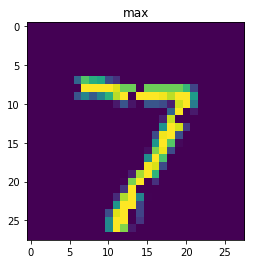

14
base_label 7
base_score 0.9999985283017713


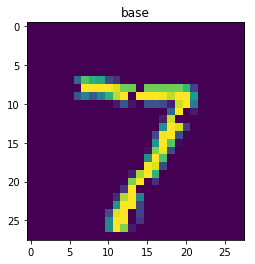

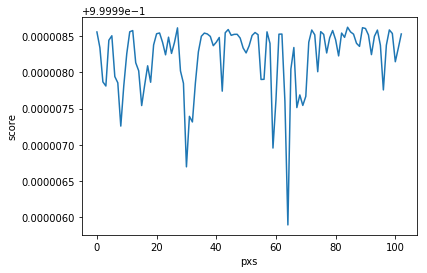

max_score 0.9999986245172295
x, y 13 22
pred [[4.43654828e-09 6.44582579e-08 7.96001032e-07 1.30126401e-07
  6.80840600e-10 7.12834351e-09 1.74954625e-11 9.99998625e-01
  3.40325556e-07 3.23082958e-08]]


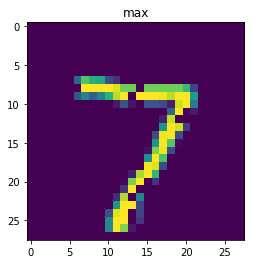

15
base_label 7
base_score 0.9999986245172295


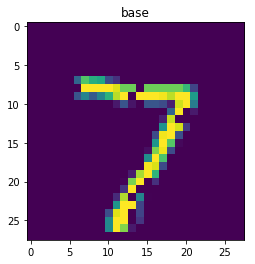

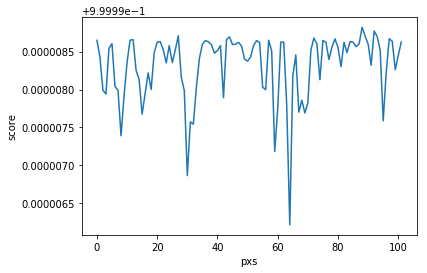

max_score 0.9999988220643186
x, y 13 23
pred [[2.33871460e-09 5.64931988e-08 6.71477355e-07 1.26321308e-07
  8.83080672e-10 5.47848384e-09 1.08130670e-11 9.99998822e-01
  2.72307023e-07 4.26257045e-08]]


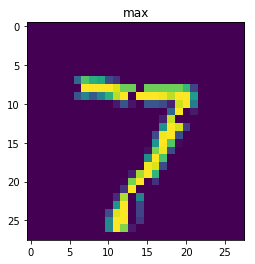

16
base_label 7
base_score 0.9999988220643186


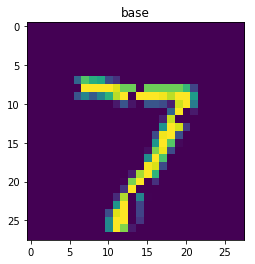

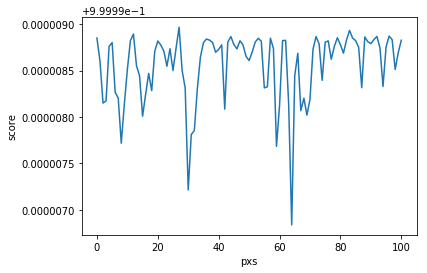

max_score 0.9999989666726179
x, y 14 9
pred [[2.21288557e-09 4.58770497e-08 6.61697592e-07 8.11004101e-08
  2.18500871e-09 3.33571221e-09 1.19520728e-11 9.99998967e-01
  1.95931359e-07 4.09754122e-08]]


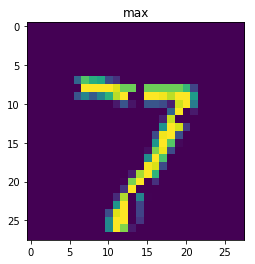

17
base_label 7
base_score 0.9999989666726179


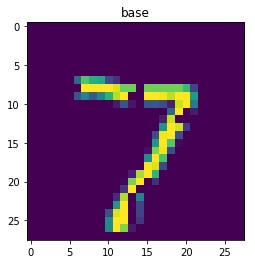

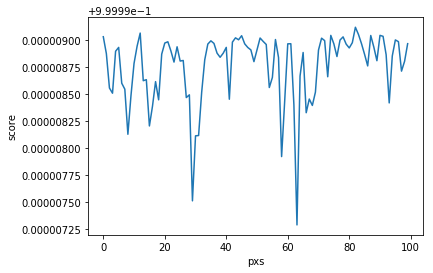

max_score 0.9999991205605878
x, y 12 22
pred [[1.33190008e-09 3.49375128e-08 5.31002704e-07 8.52769782e-08
  2.52098384e-09 2.75779401e-09 1.00556805e-11 9.99999121e-01
  1.90574764e-07 3.10267190e-08]]


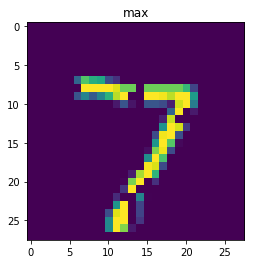

18
base_label 7
base_score 0.9999991205605878


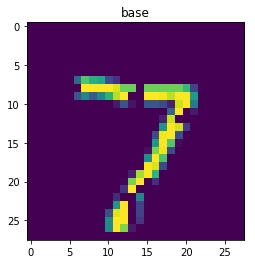

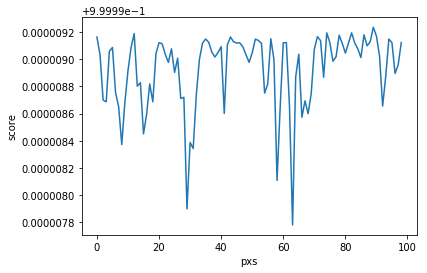

max_score 0.9999992351827122
x, y 12 24
pred [[1.11794074e-09 3.42111696e-08 5.29473286e-07 4.86013427e-08
  3.77512127e-09 1.60740352e-09 9.09392056e-12 9.99999235e-01
  1.06147503e-07 3.98744266e-08]]


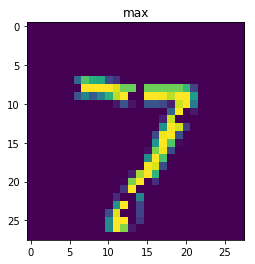

19
base_label 7
base_score 0.9999992351827122


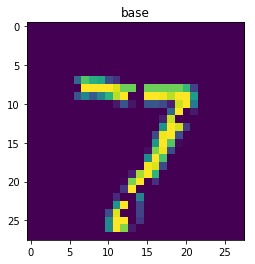

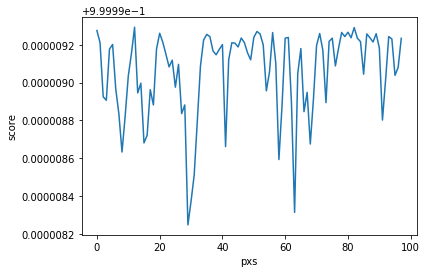

max_score 0.9999992932514484
x, y 13 8
pred [[1.23168600e-09 3.60664130e-08 4.84995671e-07 3.95321918e-08
  8.52187108e-09 1.28445727e-09 1.23568384e-11 9.99999293e-01
  9.29139315e-08 4.21899727e-08]]


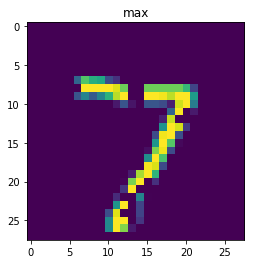

20
base_label 7
base_score 0.9999992932514484


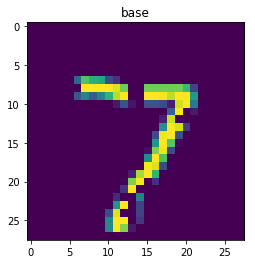

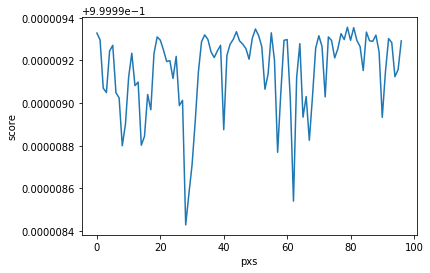

max_score 0.9999993555693537
x, y 13 21
pred [[1.07481024e-09 3.03676214e-08 3.84031795e-07 5.41250887e-08
  1.33626294e-08 1.63714544e-09 8.84654261e-12 9.99999356e-01
  9.41693929e-08 6.56533165e-08]]


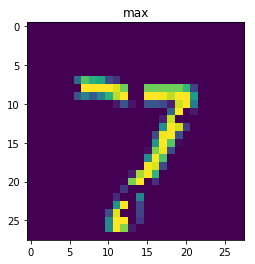

21
base_label 7
base_score 0.9999993555693537


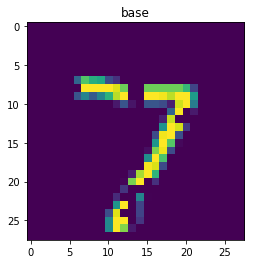

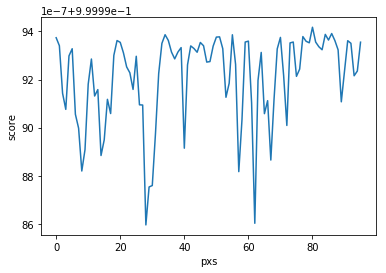

max_score 0.9999994174532377
x, y 14 22
pred [[8.23984049e-10 2.71058207e-08 3.42780419e-07 5.00163849e-08
  1.12834496e-08 1.52251160e-09 7.43708836e-12 9.99999417e-01
  9.16645099e-08 5.73422452e-08]]


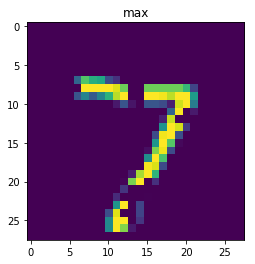

22
base_label 7
base_score 0.9999994174532377


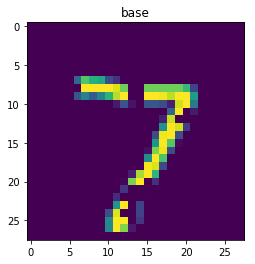

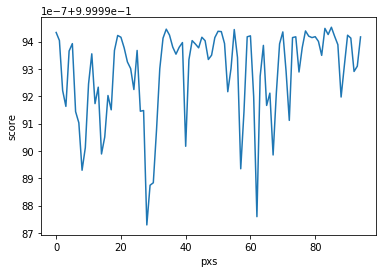

max_score 0.9999994527089704
x, y 11 24
pred [[7.04150423e-10 3.05765569e-08 4.00324963e-07 2.23926377e-08
  7.88347250e-09 6.96824184e-10 4.95971051e-12 9.99999453e-01
  5.30407575e-08 3.16667079e-08]]


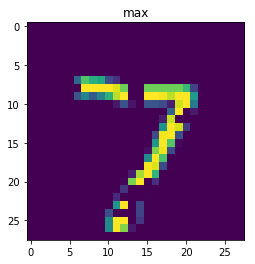

23
base_label 7
base_score 0.9999994527089704


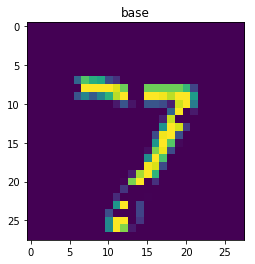

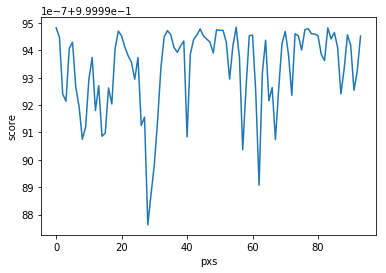

max_score 0.9999994843363215
x, y 19 14
pred [[6.74858445e-10 3.10698806e-08 3.67715573e-07 2.22951089e-08
  7.70594062e-09 7.51321183e-10 5.31772684e-12 9.99999484e-01
  5.60060591e-08 2.94396191e-08]]


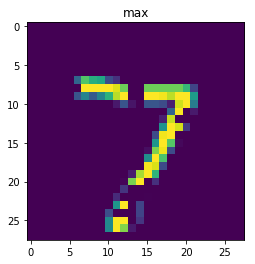

24
base_label 7
base_score 0.9999994843363215


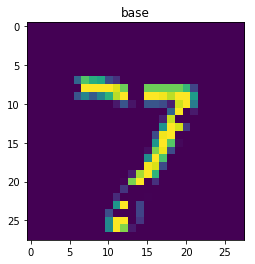

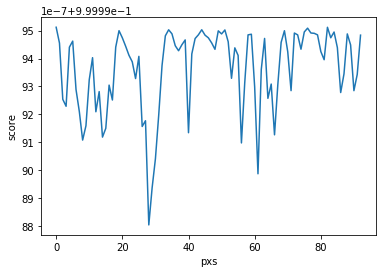

max_score 0.9999995121728232
x, y 6 7
pred [[7.32404116e-10 2.62727595e-08 3.44677445e-07 2.16931328e-08
  7.66258027e-09 8.24445325e-10 5.96741424e-12 9.99999512e-01
  5.62821173e-08 2.96763250e-08]]


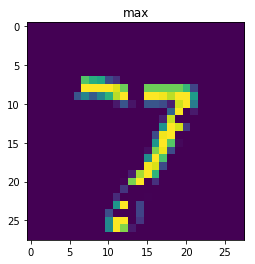

25
base_label 7
base_score 0.9999995121728232


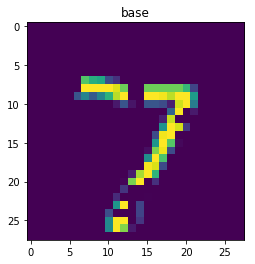

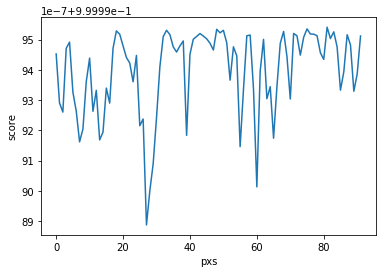

max_score 0.9999995407448234
x, y 14 23
pred [[6.58628681e-10 2.49291188e-08 3.25232834e-07 2.09799713e-08
  7.08421506e-09 7.63193874e-10 5.35468749e-12 9.99999541e-01
  5.10128803e-08 2.85889799e-08]]


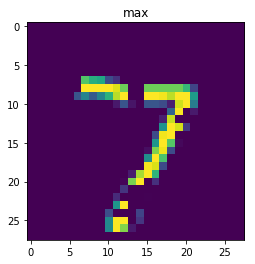

26
base_label 7
base_score 0.9999995407448234


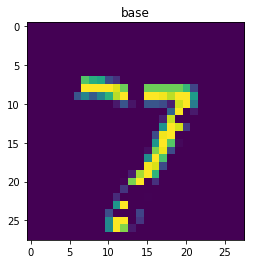

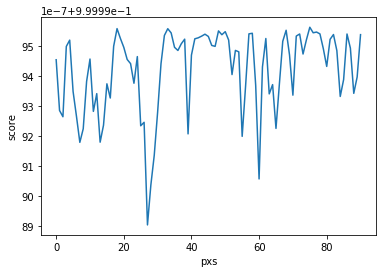

max_score 0.9999995634376014
x, y 16 20
pred [[6.45651609e-10 2.36541221e-08 3.06772809e-07 1.92284325e-08
  7.16715183e-09 7.10509442e-10 5.55861638e-12 9.99999563e-01
  4.96801468e-08 2.86980165e-08]]


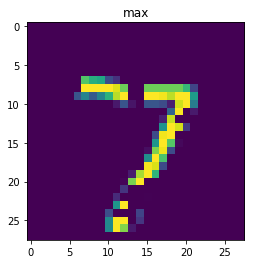

27
base_label 7
base_score 0.9999995634376014


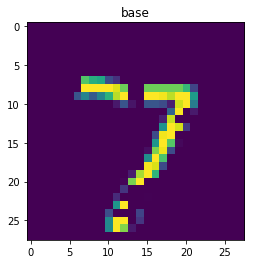

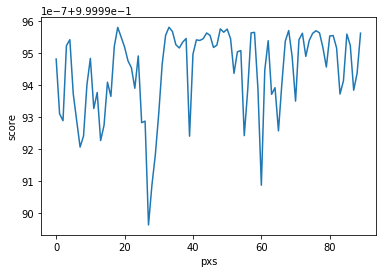

max_score 0.9999995816544063
x, y 12 10
pred [[6.09120046e-10 2.54237767e-08 2.98810351e-07 1.77775474e-08
  6.28047366e-09 6.11856595e-10 5.00998148e-12 9.99999582e-01
  4.26048231e-08 2.62226349e-08]]


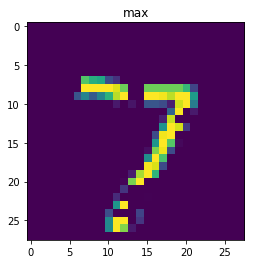

28
base_label 7
base_score 0.9999995816544063


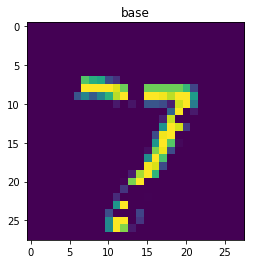

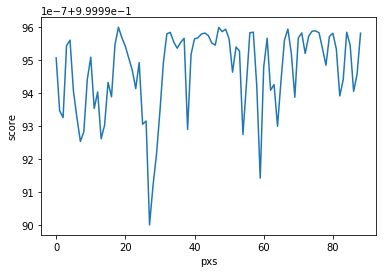

max_score 0.9999995988307393
x, y 6 9
pred [[6.44822108e-10 2.53208479e-08 2.72061363e-07 1.96731680e-08
  7.05686715e-09 7.01374961e-10 5.32678567e-12 9.99999599e-01
  4.59520627e-08 2.97534280e-08]]


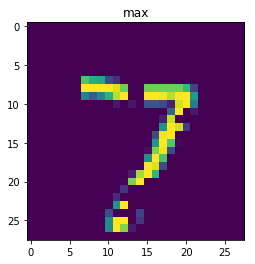

29
base_label 7
base_score 0.9999995988307393


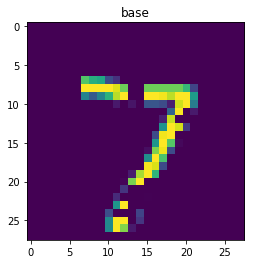

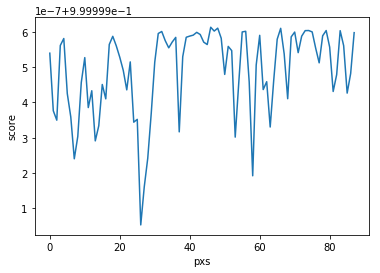

max_score 0.9999996126090696
x, y 18 13
pred [[3.99251924e-10 2.85292800e-08 2.42227541e-07 1.63458607e-08
  4.20580425e-09 1.59607929e-09 6.64590457e-12 9.99999613e-01
  7.57319642e-08 1.83485034e-08]]


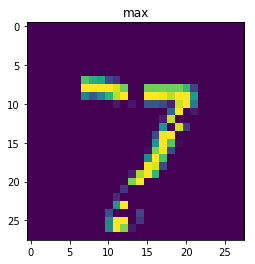

30
base_label 7
base_score 0.9999996126090696


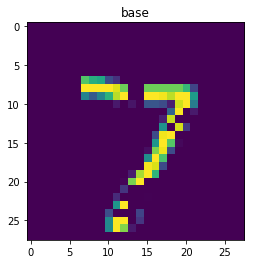

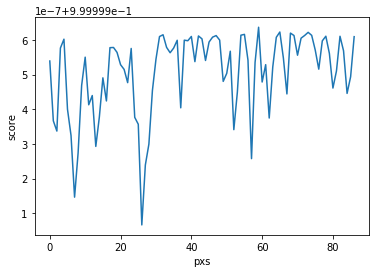

max_score 0.9999996364866321
x, y 15 17
pred [[4.28791015e-10 2.46406144e-08 2.26161687e-07 1.69974790e-08
  2.55359321e-09 2.11070062e-09 5.72044455e-12 9.99999636e-01
  7.53768641e-08 1.52379186e-08]]


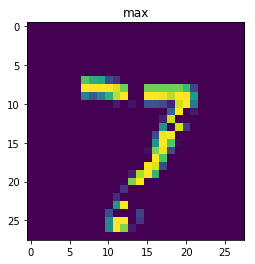

31
base_label 7
base_score 0.9999996364866321


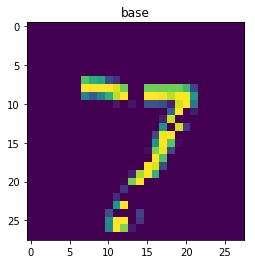

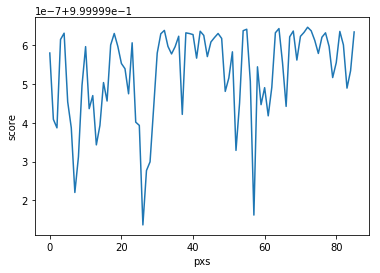

max_score 0.9999996461505873
x, y 11 22
pred [[3.91634018e-10 2.40239921e-08 2.17726080e-07 1.77263155e-08
  2.69187214e-09 1.99686931e-09 5.38381555e-12 9.99999646e-01
  7.38479786e-08 1.54392867e-08]]


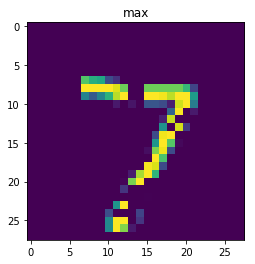

32
base_label 7
base_score 0.9999996461505873


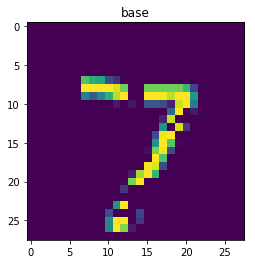

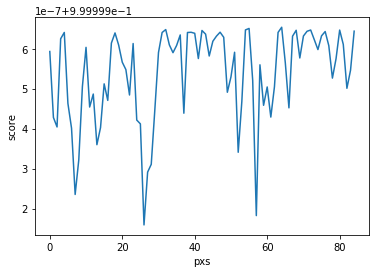

max_score 0.9999996536064489
x, y 13 19
pred [[4.05556563e-10 2.42124008e-08 2.14335756e-07 1.72589169e-08
  2.67073937e-09 1.96133328e-09 5.23759528e-12 9.99999654e-01
  6.98950079e-08 1.56486023e-08]]


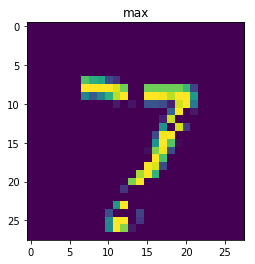

33
base_label 7
base_score 0.9999996536064489


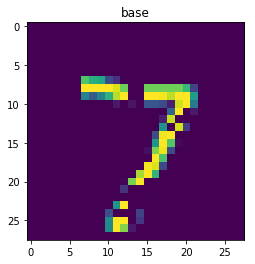

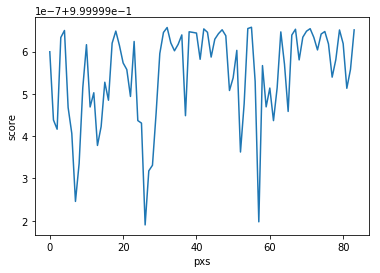

max_score 0.9999996574816511
x, y 15 16
pred [[4.06172364e-10 2.39777491e-08 2.12338607e-07 1.68180423e-08
  2.60110410e-09 1.95866818e-09 5.12165949e-12 9.99999657e-01
  6.89887242e-08 1.54241598e-08]]


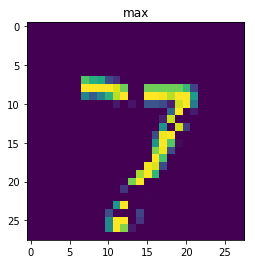

34
base_label 7
base_score 0.9999996574816511


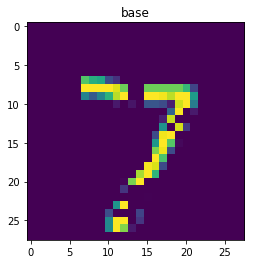

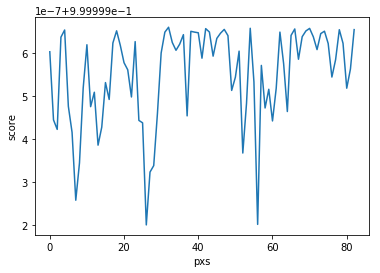

max_score 0.9999996606556275
x, y 13 10
pred [[4.00681884e-10 2.39539746e-08 2.12928016e-07 1.61813256e-08
  2.61033497e-09 1.85204367e-09 5.08150111e-12 9.99999661e-01
  6.64919582e-08 1.49209563e-08]]


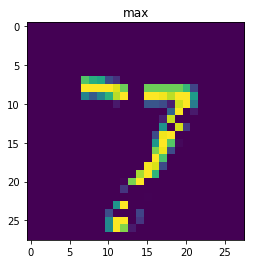

35
base_label 7
base_score 0.9999996606556275


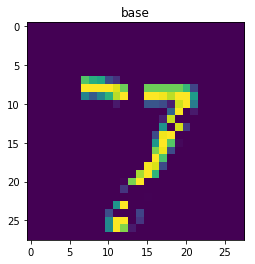

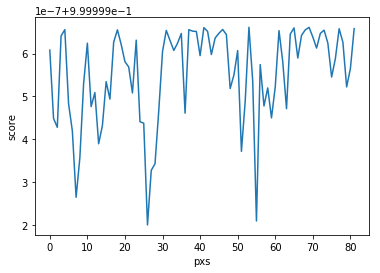

max_score 0.9999996614227563
x, y 19 15
pred [[3.99873795e-10 2.39140442e-08 2.12297507e-07 1.60807872e-08
  2.60381838e-09 1.85467902e-09 5.07837269e-12 9.99999661e-01
  6.65527569e-08 1.48686988e-08]]


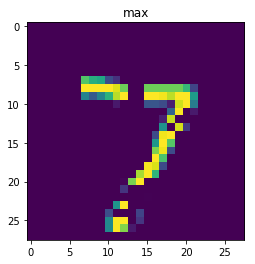

36
base_label 7
base_score 0.9999996614227563


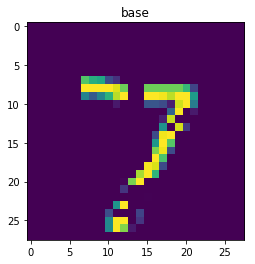

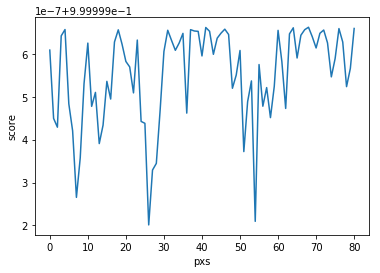

max_score 0.9999996618975775
x, y 15 22
pred [[3.98872857e-10 2.38891229e-08 2.12072403e-07 1.60431387e-08
  2.60307863e-09 1.85107145e-09 5.06925453e-12 9.99999662e-01
  6.64026909e-08 1.48369753e-08]]


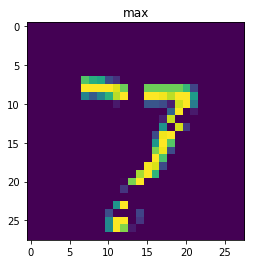

37
base_label 7
base_score 0.9999996618975775


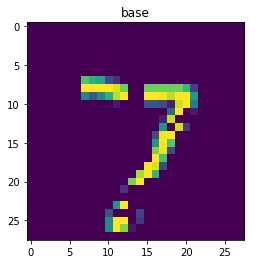

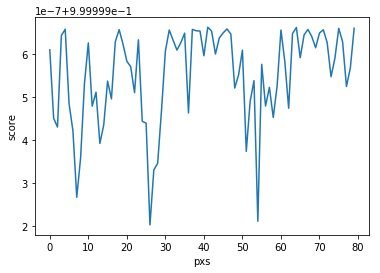

max_score 0.999999661761793
x, y 21 11
pred [[3.99910797e-10 2.46991051e-08 2.09907754e-07 1.63409291e-08
  2.62724306e-09 1.90957978e-09 5.13460937e-12 9.99999662e-01
  6.72252999e-08 1.51232501e-08]]


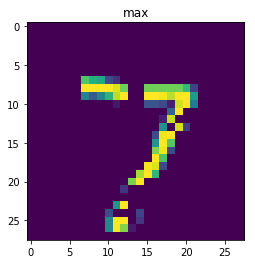

38
base_label 7
base_score 0.999999661761793


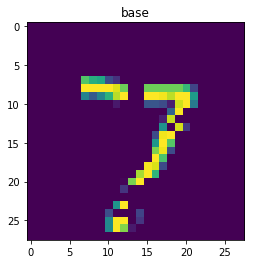

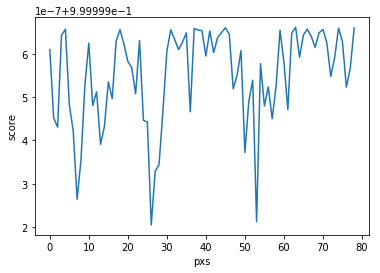

max_score 0.999999661065809
x, y 12 20
pred [[4.01608799e-10 2.46794142e-08 2.10350568e-07 1.63681890e-08
  2.65462692e-09 1.91463731e-09 5.14650490e-12 9.99999661e-01
  6.73650545e-08 1.51949457e-08]]


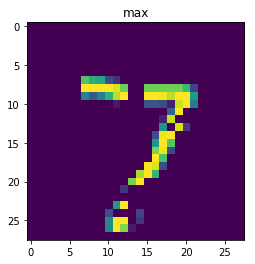

39
base_label 7
base_score 0.999999661065809


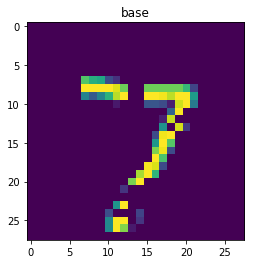

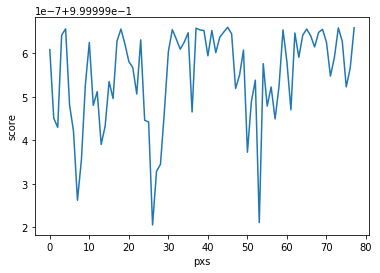

max_score 0.9999996598917262
x, y 20 13
pred [[3.80377674e-10 2.51993752e-08 2.12906505e-07 1.60106832e-08
  2.33735586e-09 2.02135642e-09 4.88456981e-12 9.99999660e-01
  6.75018091e-08 1.37459263e-08]]


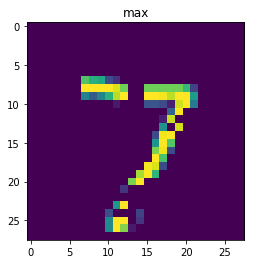

40
base_label 7
base_score 0.9999996598917262


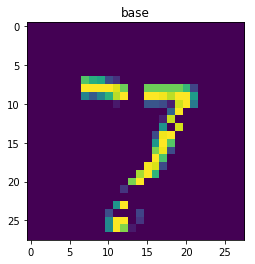

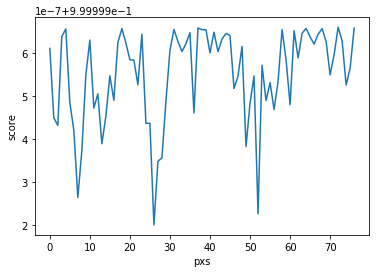

max_score 0.9999996597820161
x, y 14 25
pred [[3.73925820e-10 2.54724400e-08 2.15571763e-07 1.52873975e-08
  2.44625275e-09 1.93649558e-09 4.91966530e-12 9.99999660e-01
  6.48993899e-08 1.42253997e-08]]


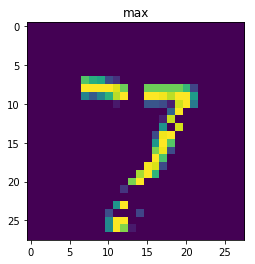

41
base_label 7
base_score 0.9999996597820161


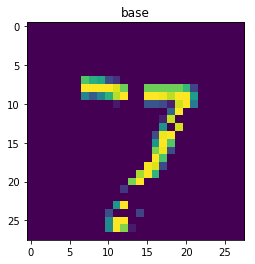

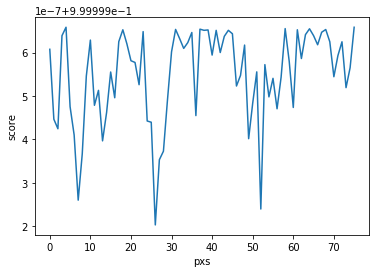

max_score 0.9999996582172486
x, y 11 7
pred [[3.78507487e-10 2.71202534e-08 2.13839511e-07 1.51050192e-08
  2.67806342e-09 1.83455617e-09 5.11472470e-12 9.99999658e-01
  6.56580667e-08 1.51636594e-08]]


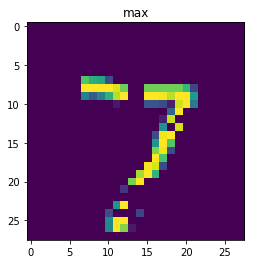

42
base_label 7
base_score 0.9999996582172486


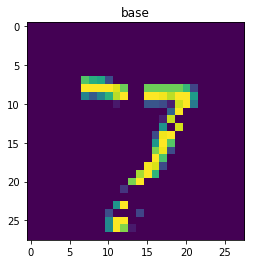

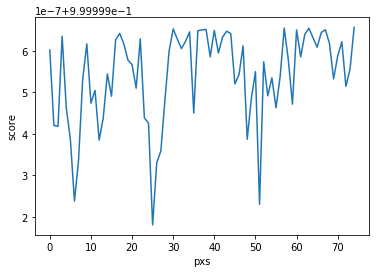

max_score 0.9999996567757236
x, y 13 26
pred [[3.77209545e-10 2.72985659e-08 2.16130693e-07 1.46279615e-08
  2.73729479e-09 1.78843924e-09 5.16282904e-12 9.99999657e-01
  6.52815895e-08 1.49773603e-08]]


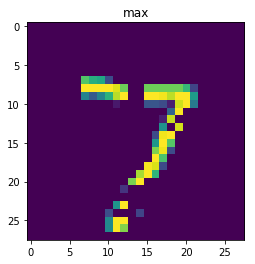

43
base_label 7
base_score 0.9999996567757236


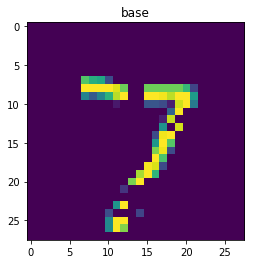

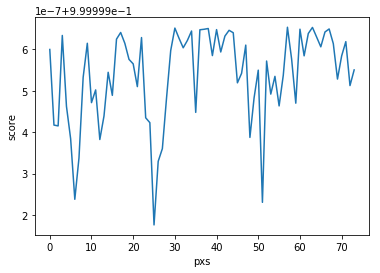

max_score 0.9999996532043162
x, y 17 18
pred [[3.83067919e-10 2.79126264e-08 2.14591095e-07 1.55515120e-08
  2.78412744e-09 1.93899115e-09 5.75019450e-12 9.99999653e-01
  6.90692135e-08 1.45593004e-08]]


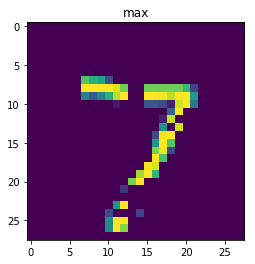

44
base_label 7
base_score 0.9999996532043162


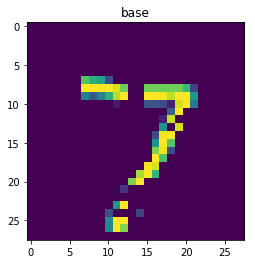

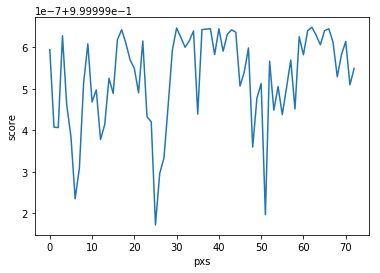

max_score 0.9999996480197211
x, y 12 21
pred [[3.81486984e-10 2.61854740e-08 2.16704584e-07 1.66497210e-08
  3.07176524e-09 1.98721318e-09 5.66080854e-12 9.99999648e-01
  7.19437437e-08 1.50506306e-08]]


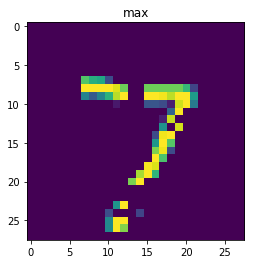

45
base_label 7
base_score 0.9999996480197211


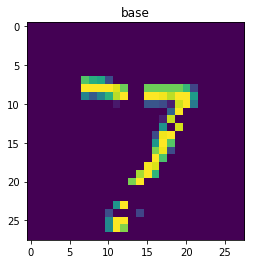

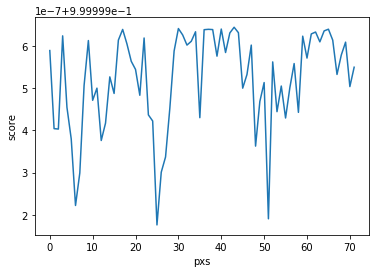

max_score 0.9999996441783594
x, y 19 13
pred [[2.87665750e-10 2.89365595e-08 2.17730487e-07 1.59867386e-08
  2.38559292e-09 2.78488303e-09 6.02561535e-12 9.99999644e-01
  7.73678729e-08 1.03358147e-08]]


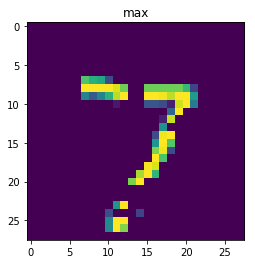

46
base_label 7
base_score 0.9999996441783594


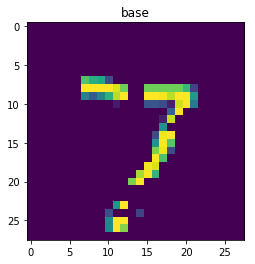

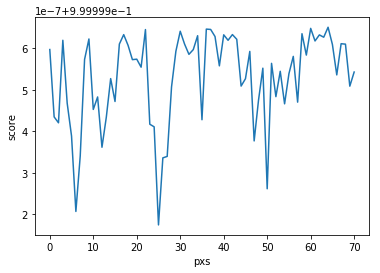

max_score 0.9999996511310774
x, y 14 24
pred [[2.73983156e-10 2.83705866e-08 2.16043102e-07 1.57302889e-08
  2.58776254e-09 2.61746234e-09 5.55973473e-12 9.99999651e-01
  7.15880921e-08 1.16520846e-08]]


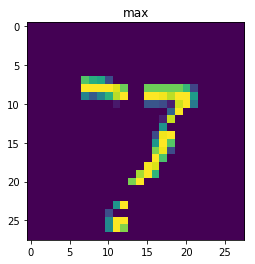

47
base_label 7
base_score 0.9999996511310774


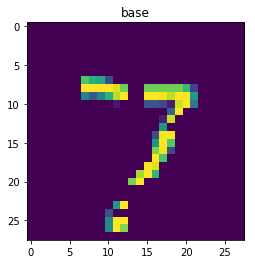

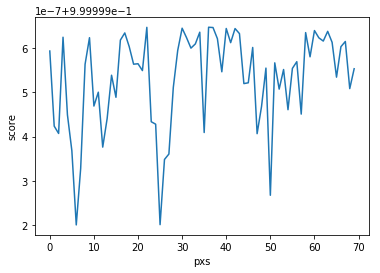

max_score 0.9999996463694905
x, y 20 10
pred [[3.58733135e-10 5.18005094e-08 1.92274162e-07 2.78321998e-08
  3.30387379e-09 6.45143158e-09 1.04927664e-11 9.99999646e-01
  5.74211199e-08 1.41779868e-08]]


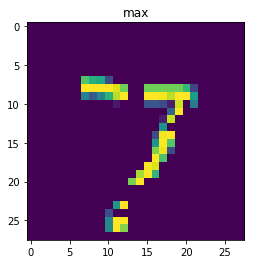

48
base_label 7
base_score 0.9999996463694905


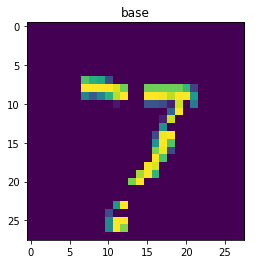

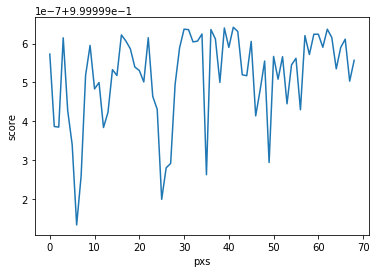

max_score 0.9999996417923236
x, y 17 13
pred [[3.54018644e-10 4.94204118e-08 1.87637639e-07 3.34960927e-08
  2.75752049e-09 8.15866556e-09 9.74878060e-12 9.99999642e-01
  6.34399406e-08 1.29336385e-08]]


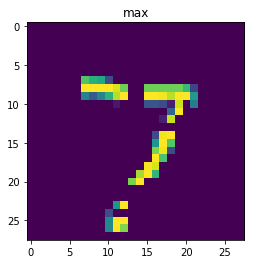

49
base_label 7
base_score 0.9999996417923236


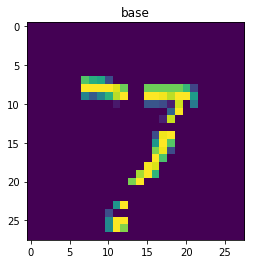

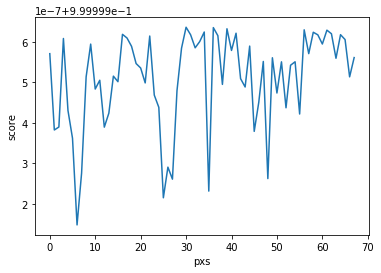

max_score 0.9999996363609521
x, y 11 10
pred [[3.64708520e-10 5.17609859e-08 1.87474620e-07 3.57161697e-08
  2.61255154e-09 8.35320401e-09 9.76259797e-12 9.99999636e-01
  6.42194507e-08 1.31275952e-08]]


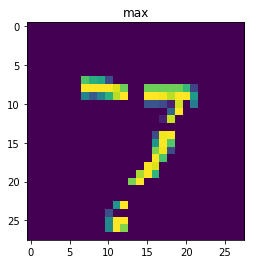

50
base_label 7
base_score 0.9999996363609521


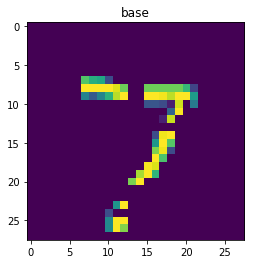

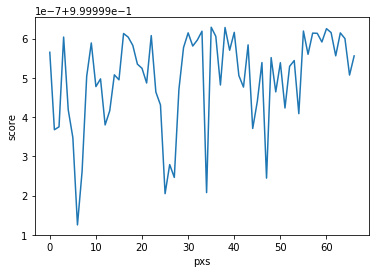

max_score 0.9999996290330093
x, y 21 10
pred [[4.08382669e-10 6.37948610e-08 1.74988346e-07 4.06428183e-08
  2.95980245e-09 1.05279663e-08 1.11286014e-11 9.99999629e-01
  6.35096700e-08 1.41240156e-08]]


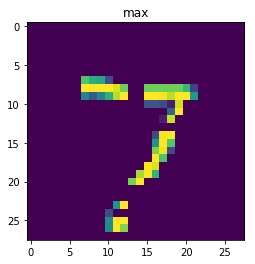

51
base_label 7
base_score 0.9999996290330093


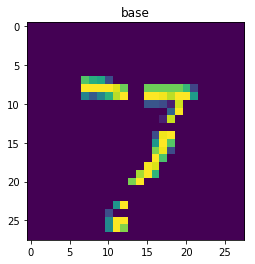

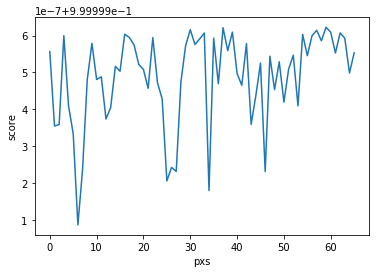

max_score 0.9999996224655352
x, y 10 24
pred [[4.14713058e-10 6.50705661e-08 1.89034730e-07 3.65659281e-08
  2.80315934e-09 9.31120278e-09 1.07620700e-11 9.99999622e-01
  6.14140014e-08 1.29094021e-08]]


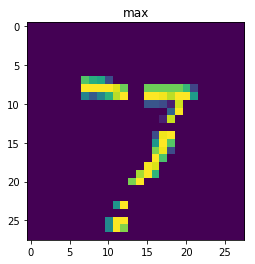

52
base_label 7
base_score 0.9999996224655352


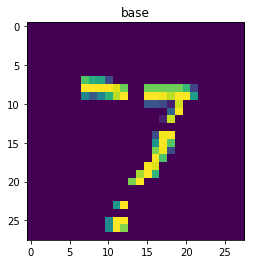

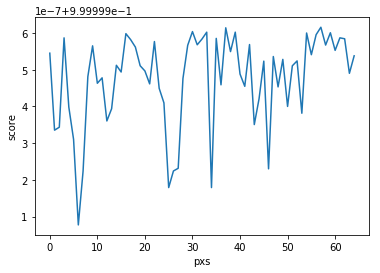

max_score 0.999999615774616
x, y 11 23
pred [[2.91125401e-10 6.79065922e-08 2.06533343e-07 3.56691184e-08
  2.88329491e-09 6.80627865e-09 7.65991669e-12 9.99999616e-01
  5.19187940e-08 1.22091771e-08]]


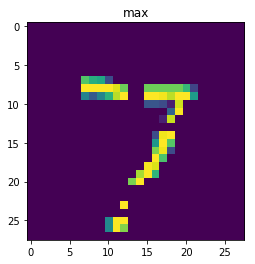

53
base_label 7
base_score 0.999999615774616


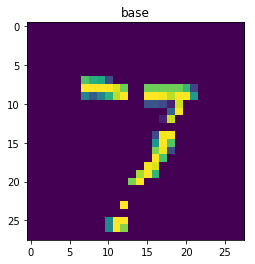

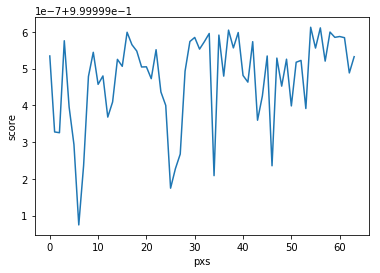

max_score 0.9999996127841139
x, y 16 19
pred [[3.41997142e-10 7.02183131e-08 1.93835822e-07 3.87404014e-08
  3.52204106e-09 7.83044174e-09 1.09608366e-11 9.99999613e-01
  5.84587150e-08 1.42571936e-08]]


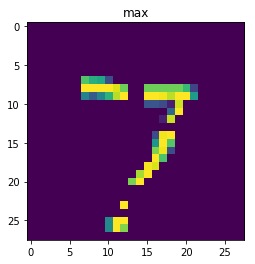

54
base_label 7
base_score 0.9999996127841139


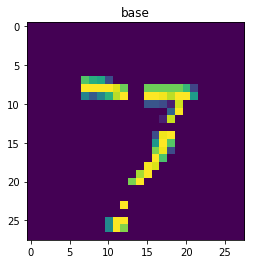

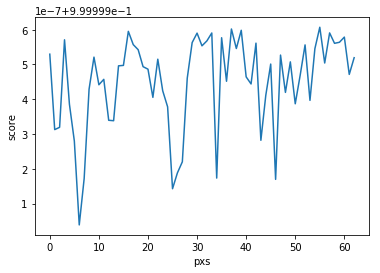

max_score 0.9999996069929539
x, y 14 20
pred [[3.89542448e-10 9.20778918e-08 1.76594198e-07 3.70550425e-08
  4.49559839e-09 5.24573157e-09 9.10386275e-12 9.99999607e-01
  5.80175078e-08 1.91224302e-08]]


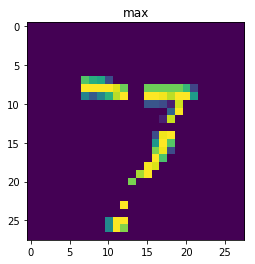

55
base_label 7
base_score 0.9999996069929539


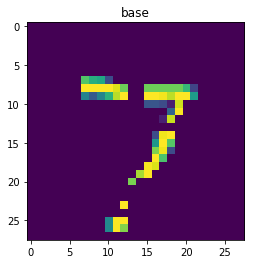

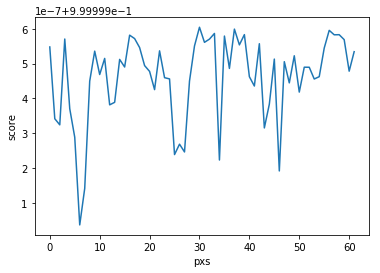

max_score 0.9999996046497139
x, y 15 10
pred [[3.61511054e-10 8.45603799e-08 1.99290021e-07 3.25861932e-08
  4.51635001e-09 4.55588710e-09 8.79317283e-12 9.99999605e-01
  5.20420952e-08 1.74290551e-08]]


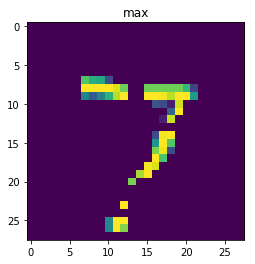

56
base_label 7
base_score 0.9999996046497139


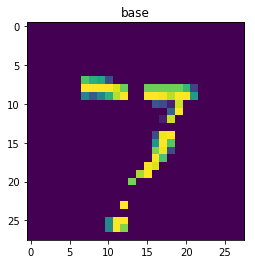

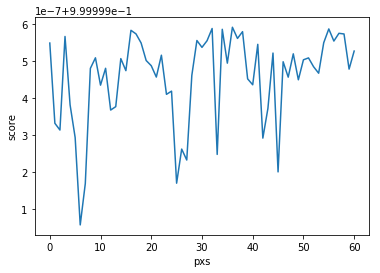

max_score 0.9999995920884671
x, y 17 12
pred [[3.58753985e-10 8.41760965e-08 2.09970066e-07 3.26491792e-08
  4.28999284e-09 4.71383741e-09 8.66924856e-12 9.99999592e-01
  5.40792265e-08 1.76657110e-08]]


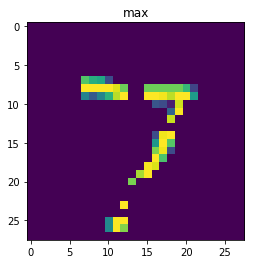

57
base_label 7
base_score 0.9999995920884671


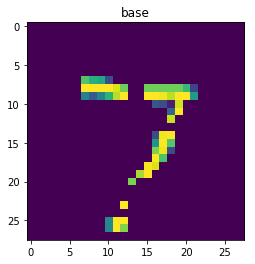

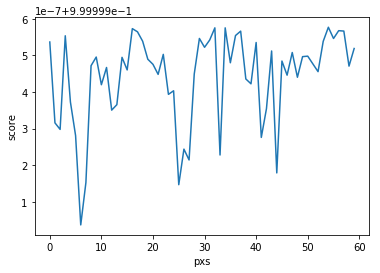

max_score 0.9999995771072879
x, y 10 25
pred [[3.65286459e-10 9.00915644e-08 2.34841502e-07 2.35662453e-08
  4.52813368e-09 3.75847100e-09 7.52609271e-12 9.99999577e-01
  5.06201612e-08 1.51138221e-08]]


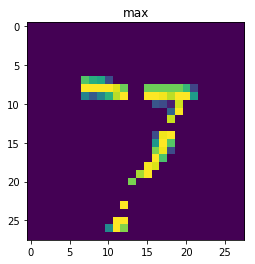

58
base_label 7
base_score 0.9999995771072879


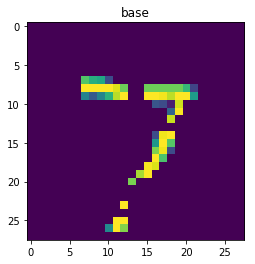

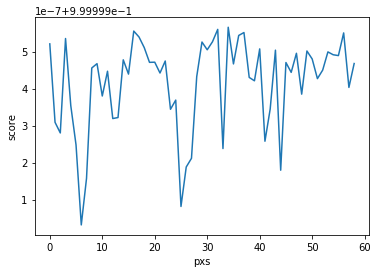

max_score 0.9999995658397125
x, y 18 11
pred [[3.28891880e-10 8.84732346e-08 2.34989094e-07 2.48575127e-08
  3.89879199e-09 4.90874924e-09 8.97258066e-12 9.99999566e-01
  6.21544361e-08 1.45406045e-08]]


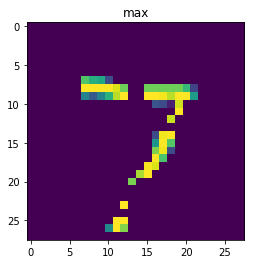

59
base_label 7
base_score 0.9999995658397125


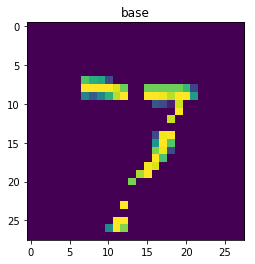

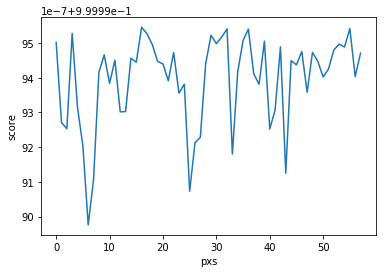

max_score 0.9999995456273776
x, y 21 8
pred [[3.51308989e-10 8.94295851e-08 2.49757234e-07 2.59091694e-08
  4.42259611e-09 5.26706419e-09 9.41734251e-12 9.99999546e-01
  6.42213234e-08 1.50049241e-08]]


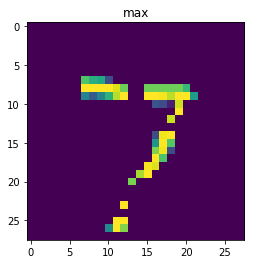

60
base_label 7
base_score 0.9999995456273776


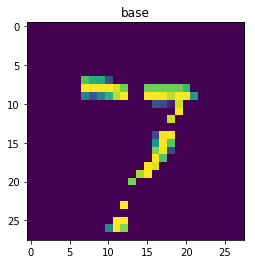

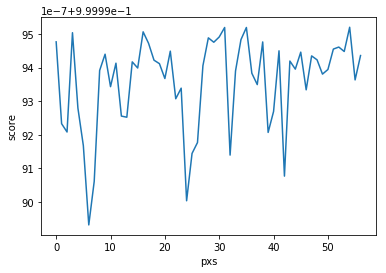

max_score 0.9999995203664476
x, y 10 26
pred [[4.03894569e-10 9.59476631e-08 2.64207359e-07 2.65453944e-08
  4.99352698e-09 6.71037772e-09 1.13864930e-11 9.99999520e-01
  6.67500947e-08 1.40638556e-08]]


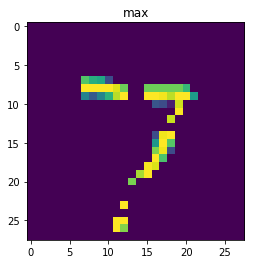

61
base_label 7
base_score 0.9999995203664476


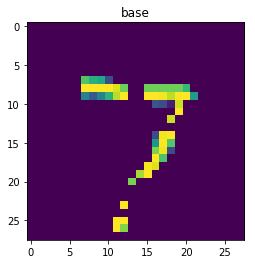

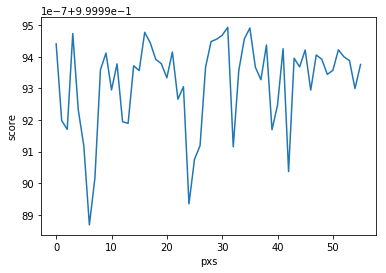

max_score 0.9999994931785072
x, y 18 10
pred [[4.11620267e-10 9.85004352e-08 2.76470748e-07 2.91923973e-08
  5.10116838e-09 7.62239324e-09 1.28546620e-11 9.99999493e-01
  7.48753685e-08 1.46345077e-08]]


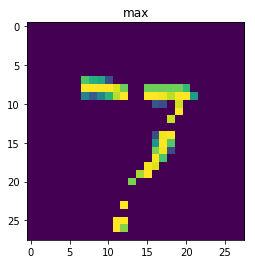

62
base_label 7
base_score 0.9999994931785072


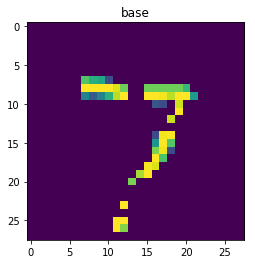

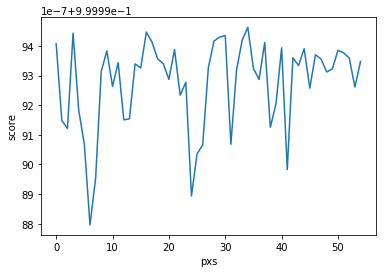

max_score 0.999999463177258
x, y 16 14
pred [[4.90842131e-10 9.81089568e-08 2.93678546e-07 3.04205550e-08
  5.30622828e-09 8.56184161e-09 1.40400166e-11 9.99999463e-01
  8.43282572e-08 1.59134755e-08]]


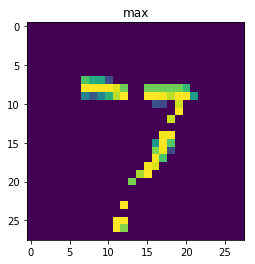

63
base_label 7
base_score 0.999999463177258


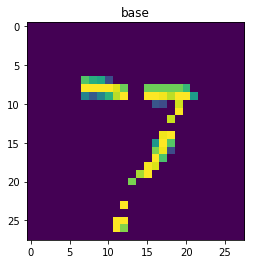

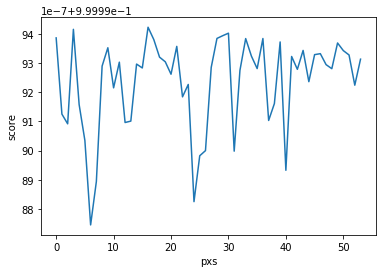

max_score 0.9999994228402631
x, y 7 9
pred [[5.55255771e-10 1.29746238e-07 3.01920592e-07 3.08548534e-08
  6.44511206e-09 9.88766038e-09 1.46940417e-11 9.99999423e-01
  7.83981404e-08 1.93371901e-08]]


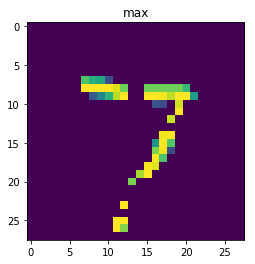

64
base_label 7
base_score 0.9999994228402631


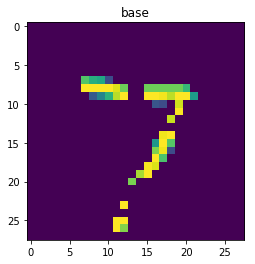

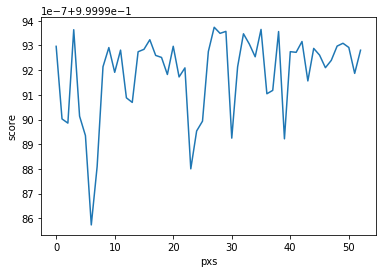

max_score 0.9999993738068105
x, y 21 9
pred [[6.26167423e-10 1.40657595e-07 3.32817287e-07 3.94170379e-08
  8.38566531e-09 1.17803226e-08 1.61585337e-11 9.99999374e-01
  7.42393648e-08 1.82535905e-08]]


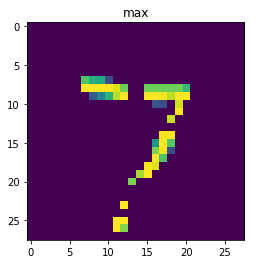

65
base_label 7
base_score 0.9999993738068105


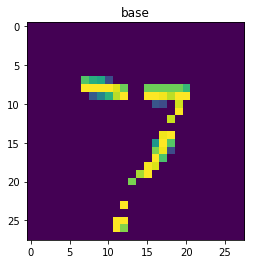

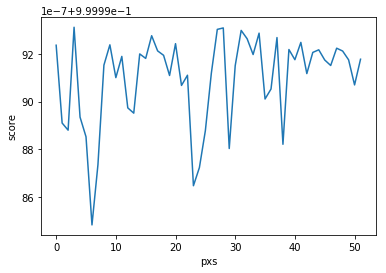

max_score 0.9999993108467979
x, y 10 7
pred [[7.16224958e-10 1.65964337e-07 3.57855411e-07 4.00803389e-08
  1.02781714e-08 1.15123972e-08 1.78069131e-11 9.99999311e-01
  7.97433273e-08 2.29851878e-08]]


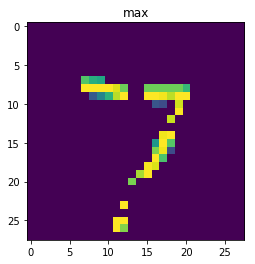

66
base_label 7
base_score 0.9999993108467979


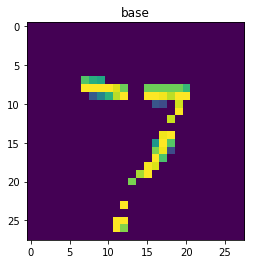

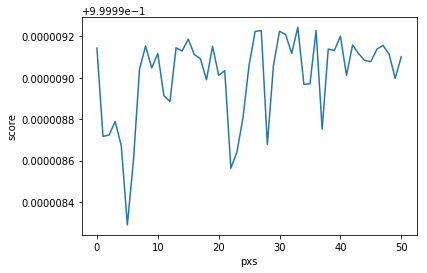

max_score 0.9999992442825689
x, y 16 15
pred [[1.15403452e-09 1.85531324e-07 4.06190756e-07 3.49667154e-08
  9.98494687e-09 1.43300979e-08 2.18527814e-11 9.99999244e-01
  8.28636963e-08 2.06740072e-08]]


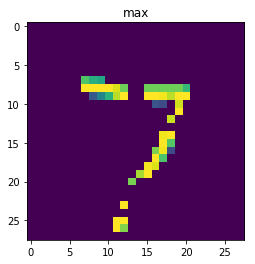

67
base_label 7
base_score 0.9999992442825689


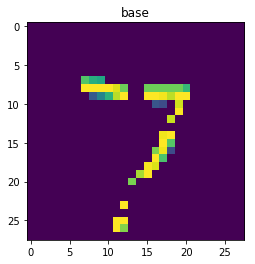

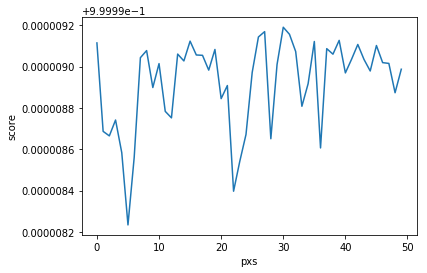

max_score 0.9999991901569759
x, y 18 12
pred [[8.36929605e-10 1.75558754e-07 4.39892179e-07 3.49564417e-08
  6.19868346e-09 2.18003312e-08 2.42022885e-11 9.99999190e-01
  1.12308265e-07 1.82672374e-08]]


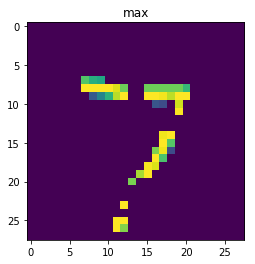

68
base_label 7
base_score 0.9999991901569759


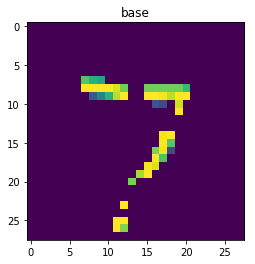

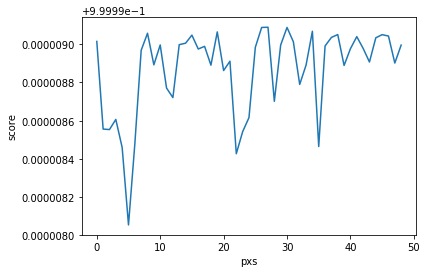

max_score 0.9999990893330559
x, y 17 10
pred [[8.51320388e-10 1.82121161e-07 4.98036798e-07 3.84409586e-08
  6.11993659e-09 2.32835591e-08 2.87054278e-11 9.99999089e-01
  1.42341856e-07 1.94426483e-08]]


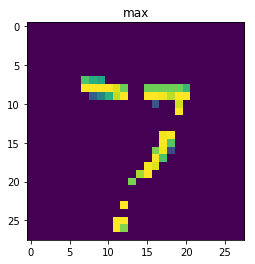

69
base_label 7
base_score 0.9999990893330559


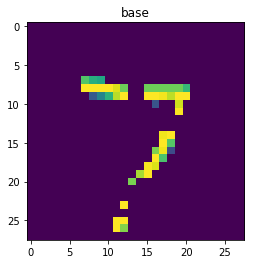

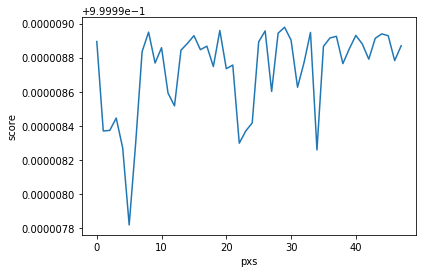

max_score 0.9999989781512802
x, y 17 14
pred [[1.22183351e-09 1.59159668e-07 5.57445579e-07 5.68331054e-08
  4.84663763e-09 4.51493395e-08 4.50682065e-11 9.99998978e-01
  1.76389853e-07 2.07576356e-08]]


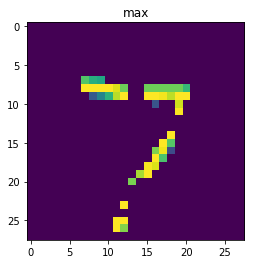

70
base_label 7
base_score 0.9999989781512802


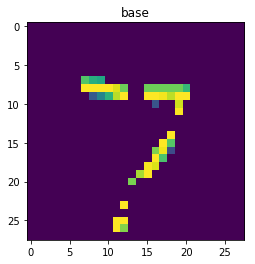

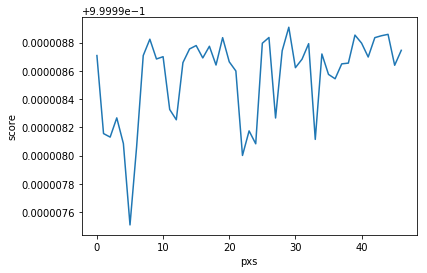

max_score 0.9999989082723174
x, y 18 14
pred [[8.99825800e-10 1.95628300e-07 4.81307902e-07 6.98158486e-08
  2.56002041e-09 9.85382910e-08 5.70908968e-11 9.99998908e-01
  2.33154315e-07 9.76608816e-09]]


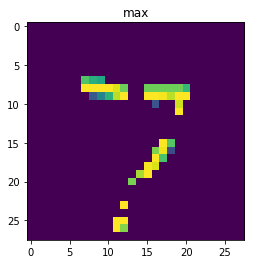

71
base_label 7
base_score 0.9999989082723174


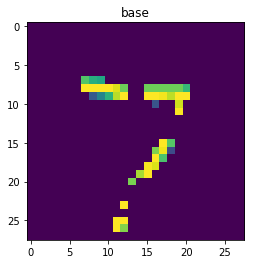

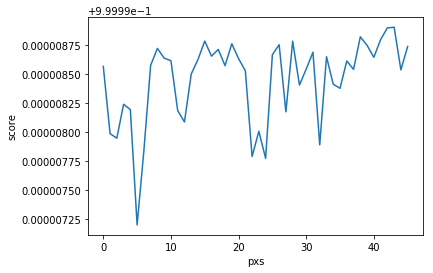

max_score 0.9999989037158973
x, y 12 25
pred [[7.90998899e-10 2.08422137e-07 6.61774704e-07 4.03878910e-08
  3.93279424e-09 4.98231759e-08 4.24193367e-11 9.99998904e-01
  1.19781043e-07 1.13289393e-08]]


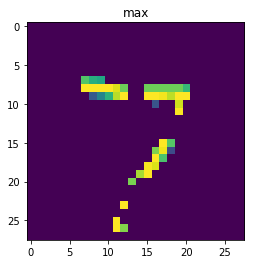

72
base_label 7
base_score 0.9999989037158973


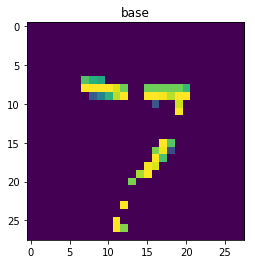

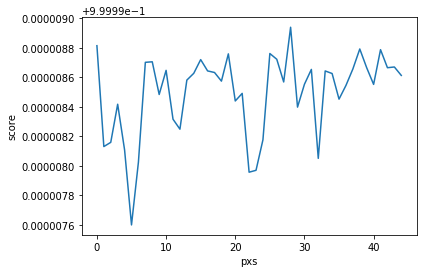

max_score 0.999998940108777
x, y 19 11
pred [[5.07617773e-10 1.90107213e-07 5.44130497e-07 3.88690766e-08
  1.95304674e-09 1.33154723e-07 8.11724207e-11 9.99998940e-01
  1.43968528e-07 7.11934784e-09]]


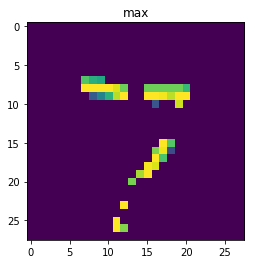

73
base_label 7
base_score 0.999998940108777


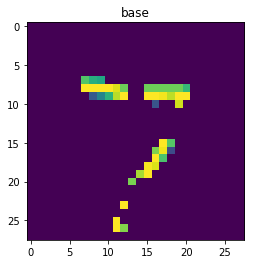

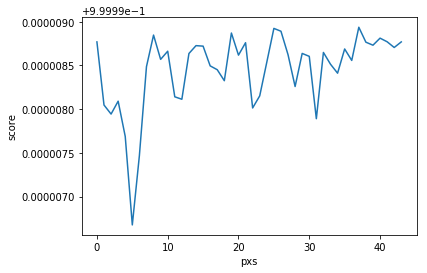

max_score 0.999998937271953
x, y 14 19
pred [[1.04648211e-09 2.52374393e-07 4.73402366e-07 4.22314476e-08
  1.95491516e-09 1.21367927e-07 9.26268870e-11 9.99998937e-01
  1.58105222e-07 1.21526674e-08]]


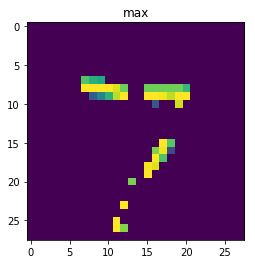

74
base_label 7
base_score 0.999998937271953


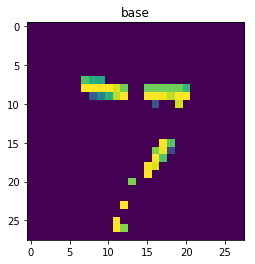

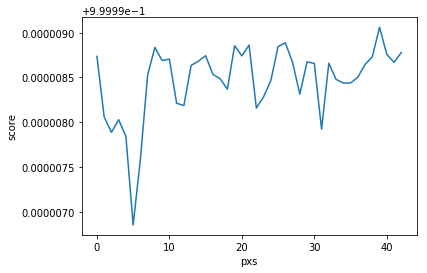

max_score 0.9999990610037814
x, y 12 23
pred [[4.40312328e-10 2.06652567e-07 5.08003086e-07 3.31302583e-08
  1.59214879e-09 8.97805650e-08 5.54670326e-11 9.99999061e-01
  8.80773163e-08 1.12644974e-08]]


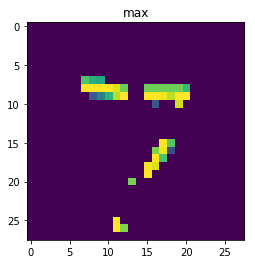

75
base_label 7
base_score 0.9999990610037814


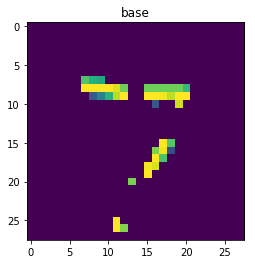

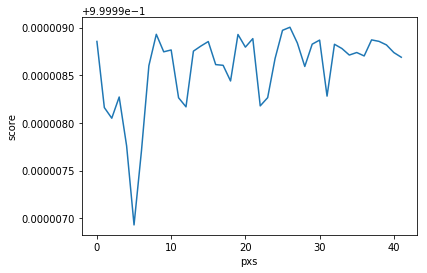

max_score 0.9999990036122335
x, y 16 10
pred [[4.51312720e-10 2.11381418e-07 5.55376319e-07 3.69983539e-08
  1.57081180e-09 9.05332092e-08 6.03031669e-11 9.99999004e-01
  8.77310072e-08 1.22850308e-08]]


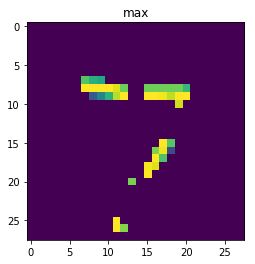

76
base_label 7
base_score 0.9999990036122335


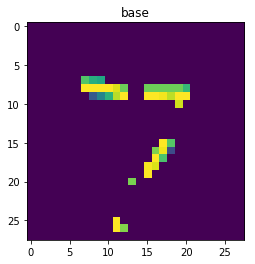

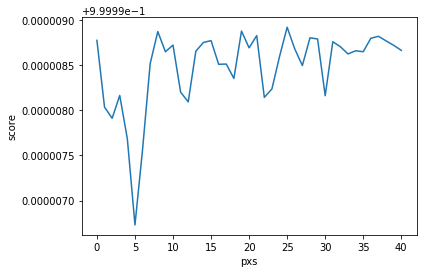

max_score 0.9999989194905143
x, y 20 9
pred [[6.69090731e-10 2.01103254e-07 5.19817547e-07 8.86591260e-08
  3.74852206e-09 1.69736623e-07 1.29244649e-10 9.99998919e-01
  8.16186397e-08 1.50274377e-08]]


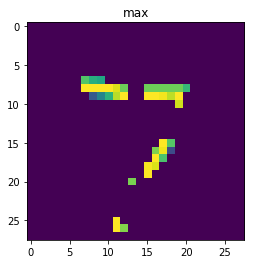

77
base_label 7
base_score 0.9999989194905143


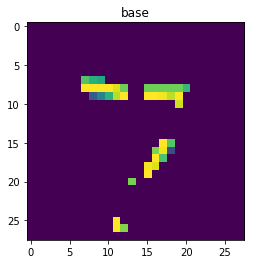

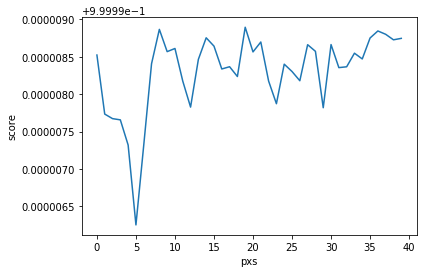

max_score 0.9999988929334157
x, y 12 9
pred [[1.31986217e-09 2.69061514e-07 5.45033145e-07 5.42707270e-08
  9.39309139e-09 1.22830988e-07 2.23574242e-10 9.99998893e-01
  8.01900993e-08 2.47435829e-08]]


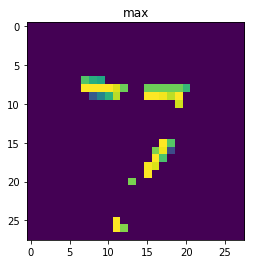

78
base_label 7
base_score 0.9999988929334157


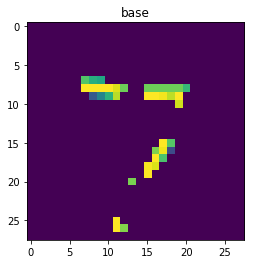

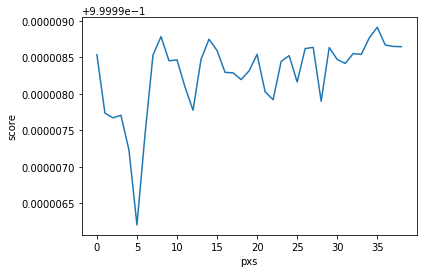

max_score 0.9999989133351852
x, y 13 20
pred [[1.04610881e-09 3.14142531e-07 4.79065156e-07 6.33564677e-08
  1.65841324e-08 1.15972452e-07 1.47848186e-10 9.99998913e-01
  6.49426383e-08 3.14074802e-08]]


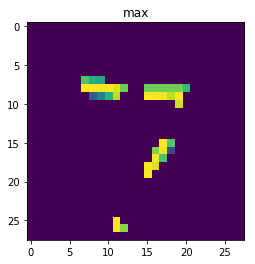

79
base_label 7
base_score 0.9999989133351852


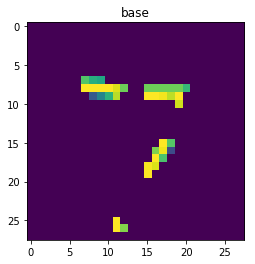

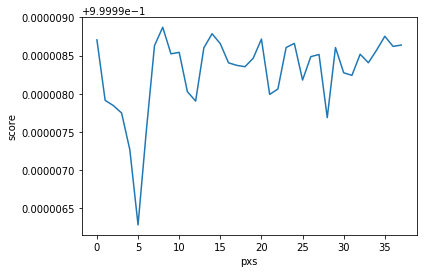

max_score 0.9999988721331698
x, y 12 8
pred [[1.17637732e-09 3.75421604e-07 4.50865360e-07 4.26928922e-08
  3.47466971e-08 1.09383002e-07 1.70634836e-10 9.99998872e-01
  7.45897433e-08 3.88205181e-08]]


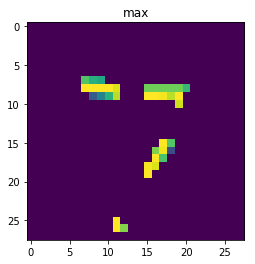

80
base_label 7
base_score 0.9999988721331698


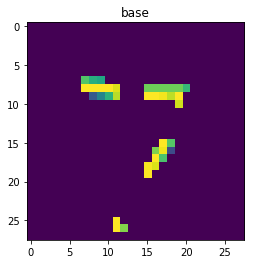

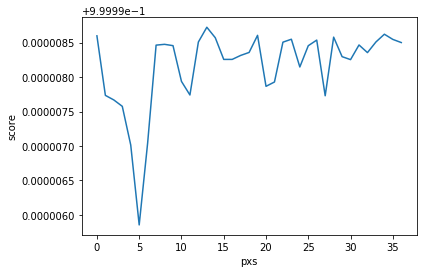

max_score 0.999998723394122
x, y 20 8
pred [[1.57850068e-09 3.47060892e-07 5.52371496e-07 6.34727622e-08
  6.50421699e-08 1.23646342e-07 1.85633602e-10 9.99998723e-01
  8.09240372e-08 4.23240450e-08]]


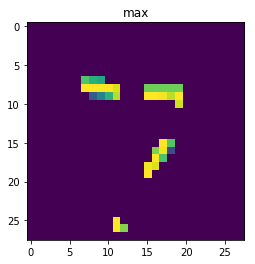

81
base_label 7
base_score 0.999998723394122


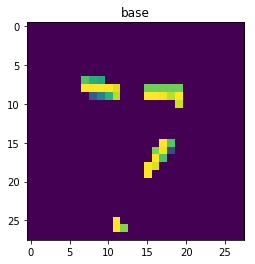

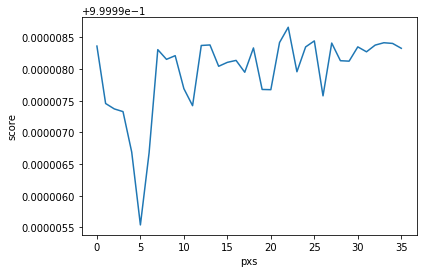

max_score 0.9999986597795462
x, y 19 10
pred [[1.04168607e-09 3.41099902e-07 4.16031986e-07 9.99693955e-08
  4.67175714e-08 3.07778088e-07 3.97773395e-10 9.99998660e-01
  1.04663606e-07 2.25204460e-08]]


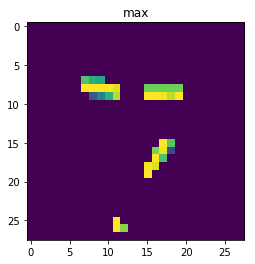

82
base_label 7
base_score 0.9999986597795462


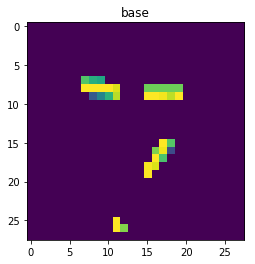

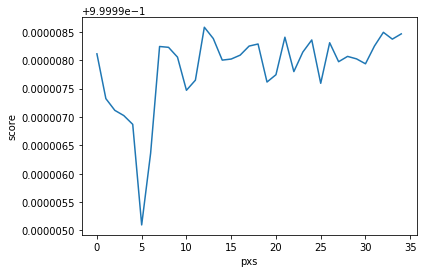

max_score 0.9999985801983776
x, y 19 8
pred [[1.19844330e-09 3.09130769e-07 4.89500020e-07 1.38534231e-07
  6.53955308e-08 2.73019494e-07 4.63779686e-10 9.99998580e-01
  1.14811381e-07 2.77479735e-08]]


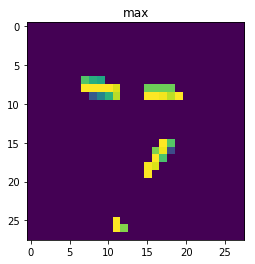

83
base_label 7
base_score 0.9999985801983776


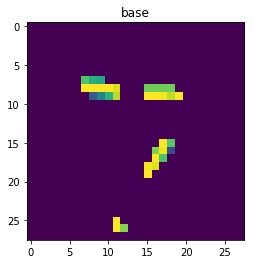

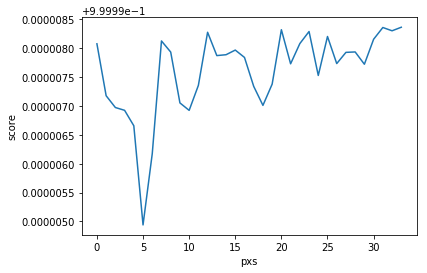

max_score 0.99999836373724
x, y 12 26
pred [[1.40000664e-09 4.47044918e-07 6.86409183e-07 9.93300502e-08
  1.04482438e-07 1.93377346e-07 5.15512374e-10 9.99998364e-01
  8.54601290e-08 1.82431781e-08]]


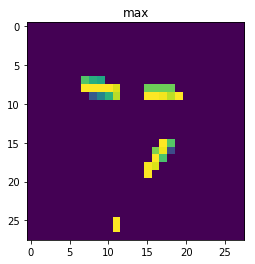

84
base_label 7
base_score 0.99999836373724


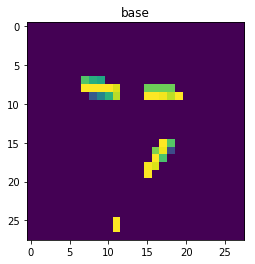

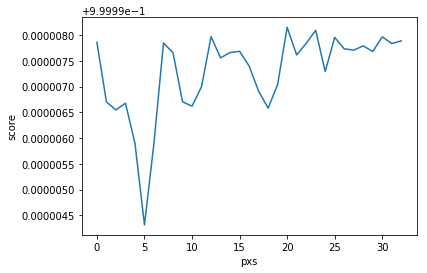

max_score 0.9999981518811668
x, y 19 9
pred [[1.61713023e-09 4.98550262e-07 6.88238904e-07 1.70983726e-07
  1.74867805e-07 2.01293355e-07 9.26186507e-10 9.99998152e-01
  9.72890536e-08 1.43524109e-08]]


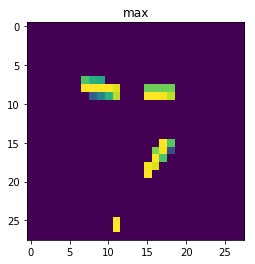

85
base_label 7
base_score 0.9999981518811668


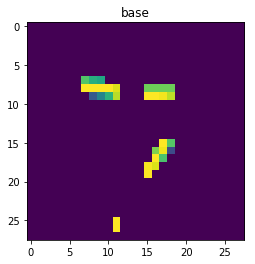

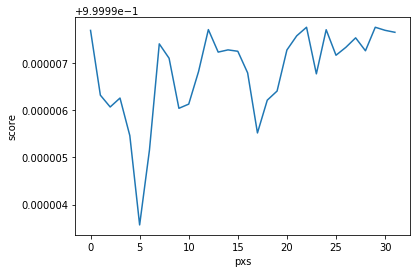

max_score 0.9999977610635049
x, y 16 16
pred [[2.12690091e-09 6.13874404e-07 8.70640707e-07 2.47693951e-07
  9.29482684e-08 2.70284109e-07 9.52448380e-10 9.99997761e-01
  1.30972605e-07 9.44310121e-09]]


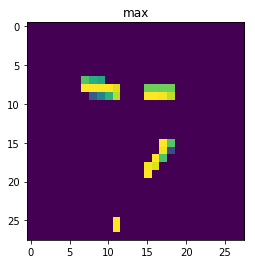

86
base_label 7
base_score 0.9999977610635049


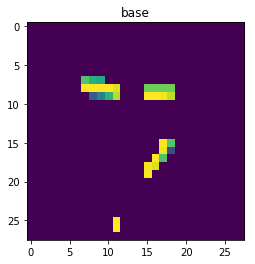

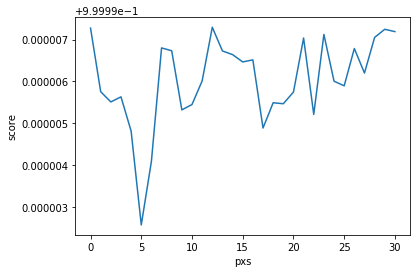

max_score 0.9999972961164463
x, y 8 9
pred [[2.67825870e-09 7.50870170e-07 1.14586278e-06 2.93868128e-07
  9.71920637e-08 2.65832714e-07 1.09011786e-09 9.99997296e-01
  1.36556999e-07 9.93232482e-09]]


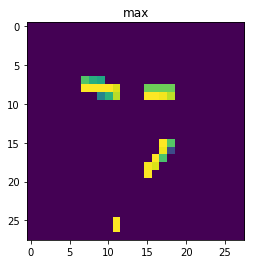

87
base_label 7
base_score 0.9999972961164463


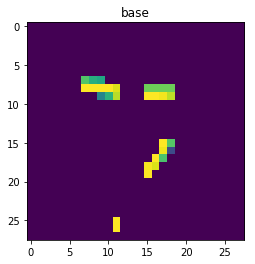

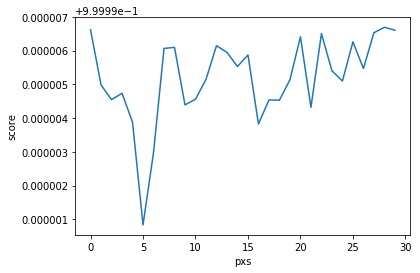

max_score 0.9999966928485471
x, y 11 25
pred [[3.82295973e-09 1.21342385e-06 1.56261202e-06 1.24839976e-07
  1.18723963e-07 1.67728843e-07 9.41747702e-10 9.99996693e-01
  1.07075941e-07 7.98214476e-09]]


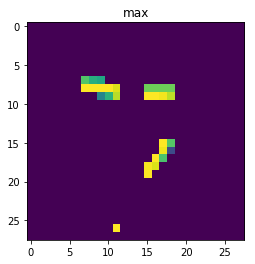

88
base_label 7
base_score 0.9999966928485471


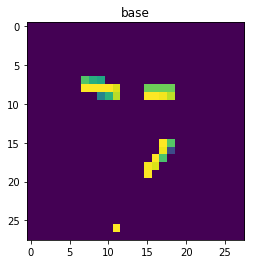

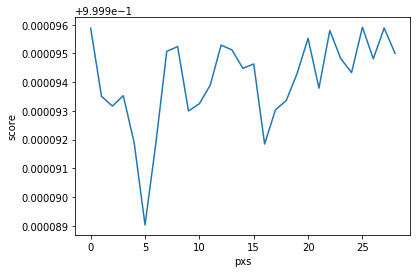

max_score 0.9999959132925881
x, y 15 18
pred [[4.94187937e-09 1.84642478e-06 1.41134757e-06 2.04779114e-07
  9.20080372e-08 3.81385905e-07 1.17199390e-09 9.99995913e-01
  1.31916993e-07 1.27311413e-08]]


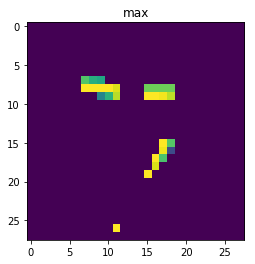

89
base_label 7
base_score 0.9999959132925881


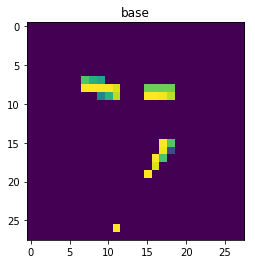

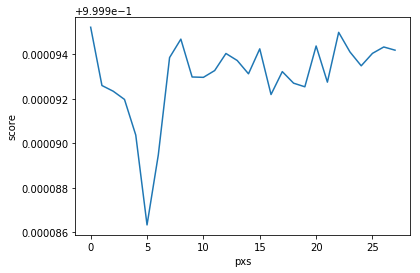

max_score 0.9999952138090767
x, y 7 7
pred [[1.12356581e-08 1.94867105e-06 1.74916479e-06 2.43511795e-07
  8.61376810e-08 5.56801602e-07 1.78125153e-09 9.99995214e-01
  1.68828157e-07 2.00589421e-08]]


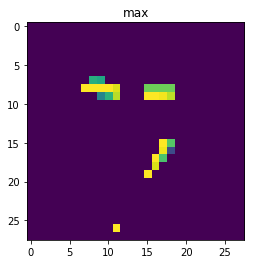

90
base_label 7
base_score 0.9999952138090767


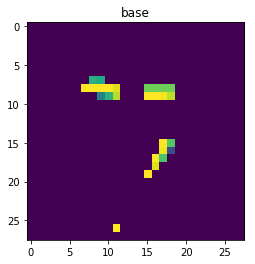

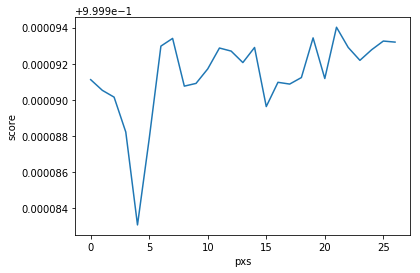

max_score 0.999994019649661
x, y 18 16
pred [[1.43967147e-08 2.33077505e-06 2.33406569e-06 3.09749611e-07
  8.40358296e-08 6.60224881e-07 1.93217509e-09 9.99994020e-01
  2.19979337e-07 2.51910493e-08]]


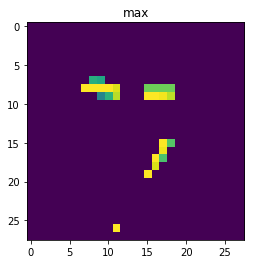

91
base_label 7
base_score 0.999994019649661


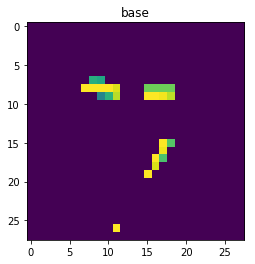

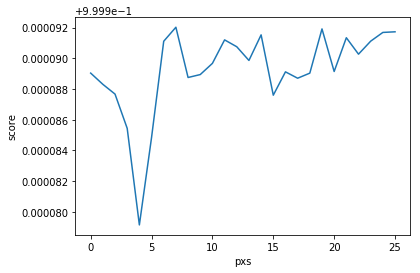

max_score 0.9999920187912743
x, y 15 8
pred [[1.47622727e-08 2.69161612e-06 3.22082235e-06 4.67505208e-07
  2.59385709e-07 1.03871954e-06 3.79165513e-09 9.99992019e-01
  2.47539641e-07 3.70662324e-08]]


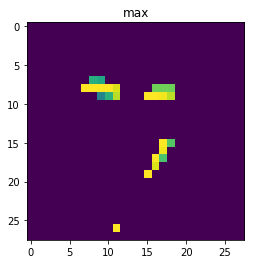

92
base_label 7
base_score 0.9999920187912743


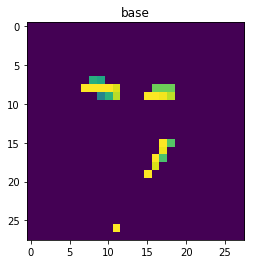

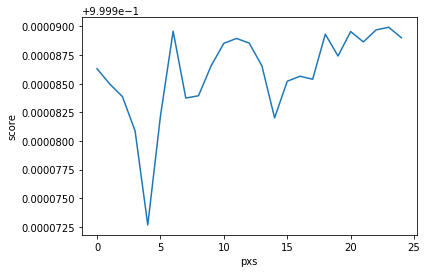

max_score 0.9999899286908426
x, y 15 19
pred [[1.96187341e-08 4.72415605e-06 2.79835048e-06 5.64260581e-07
  2.34768060e-07 1.42798268e-06 3.85704217e-09 9.99989929e-01
  2.40110543e-07 5.82049788e-08]]


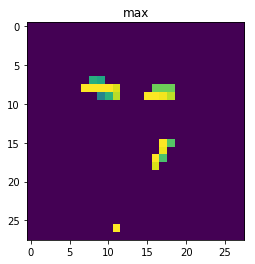

93
base_label 7
base_score 0.9999899286908426


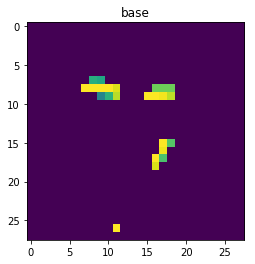

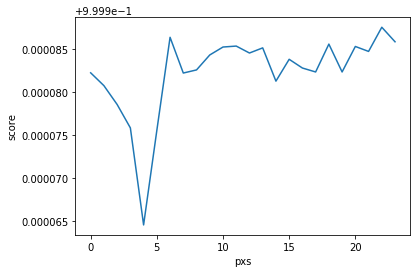

max_score 0.9999875190239731
x, y 16 18
pred [[1.86532685e-08 5.42455884e-06 2.91323838e-06 8.85473368e-07
  1.91371415e-07 2.71651573e-06 5.20160092e-09 9.99987519e-01
  2.71661185e-07 5.43022332e-08]]


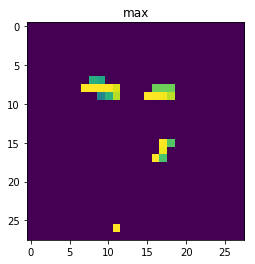

94
base_label 7
base_score 0.9999875190239731


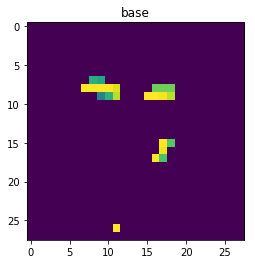

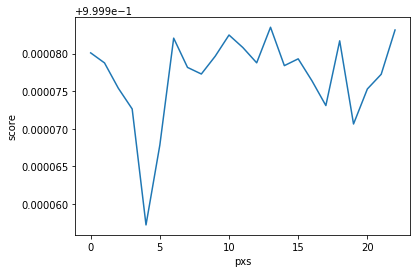

max_score 0.9999835121470572
x, y 15 9
pred [[2.95231055e-08 6.63232589e-06 4.46087276e-06 9.69103511e-07
  9.18690255e-07 3.12000726e-06 1.33163575e-08 9.99983512e-01
  2.61675735e-07 8.23380717e-08]]


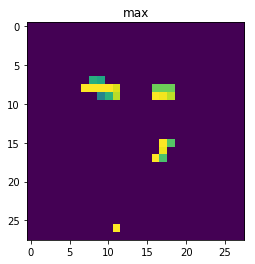

95
base_label 7
base_score 0.9999835121470572


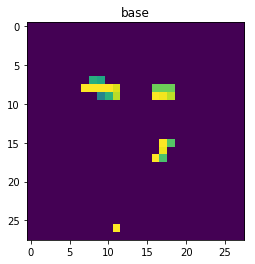

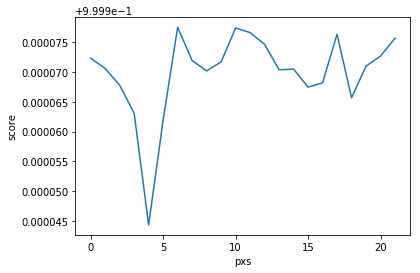

max_score 0.9999775164018928
x, y 11 8
pred [[4.76021385e-08 9.99997213e-06 4.55925316e-06 9.77259240e-07
  2.86938845e-06 3.30774677e-06 2.36021367e-08 9.99977516e-01
  5.21050748e-07 1.77723324e-07]]


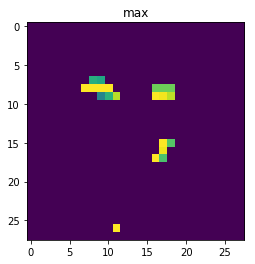

96
base_label 7
base_score 0.9999775164018928


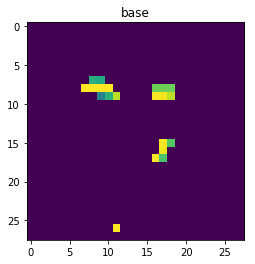

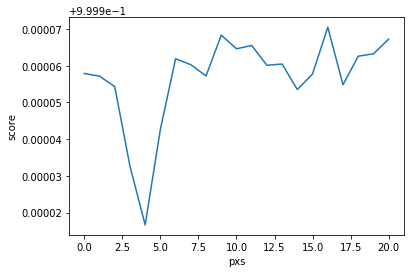

max_score 0.9999705050615685
x, y 18 15
pred [[6.19728885e-08 1.51532111e-05 6.35047640e-06 1.20969669e-06
  1.57325062e-06 4.25281985e-06 2.81429930e-08 9.99970505e-01
  7.10711004e-07 1.54656858e-07]]


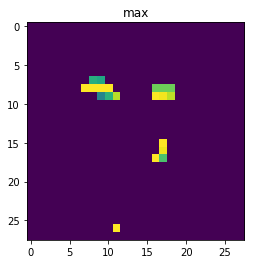

97
base_label 7
base_score 0.9999705050615685


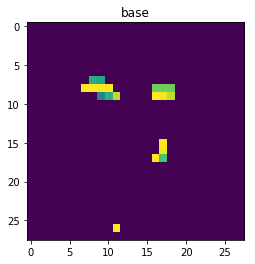

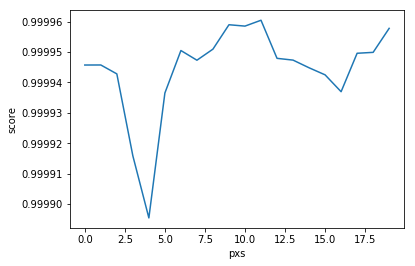

max_score 0.999960432640725
x, y 11 9
pred [[1.15873307e-07 2.06245155e-05 6.66195645e-06 1.14909068e-06
  3.96334747e-06 5.29803959e-06 4.97700786e-08 9.99960433e-01
  1.36195775e-06 3.42808491e-07]]


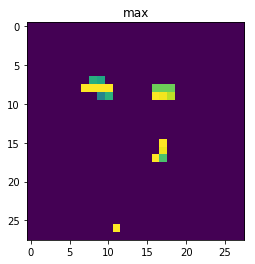

98
base_label 7
base_score 0.999960432640725


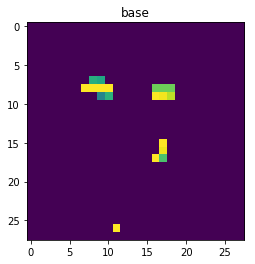

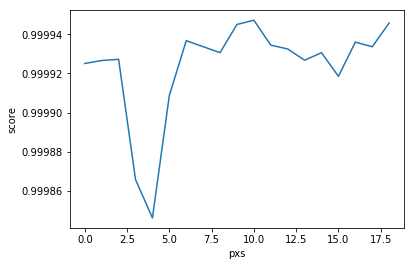

max_score 0.9999471159176454
x, y 10 9
pred [[1.95679490e-07 2.51143569e-05 9.75946242e-06 1.59729435e-06
  7.41411064e-06 6.02898027e-06 7.77685107e-08 9.99947116e-01
  2.00158218e-06 6.94847598e-07]]


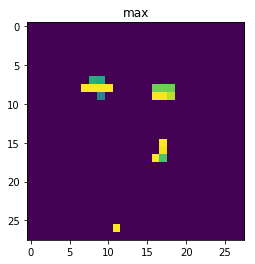

99
base_label 7
base_score 0.9999471159176454


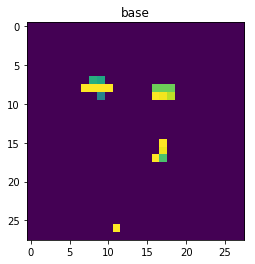

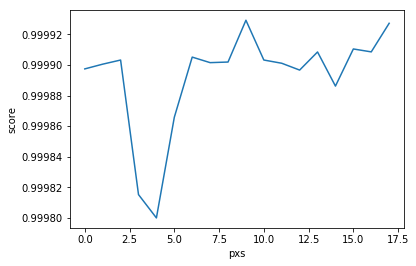

max_score 0.9999292893297745
x, y 9 9
pred [[3.17198009e-07 3.37785612e-05 1.46391934e-05 2.66330836e-06
  9.05659417e-06 6.55697895e-06 1.06630890e-07 9.99929289e-01
  2.51065490e-06 1.08155030e-06]]


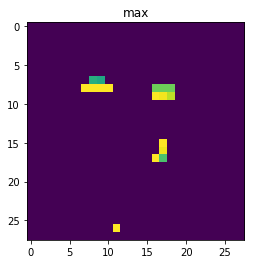

100
base_label 7
base_score 0.9999292893297745


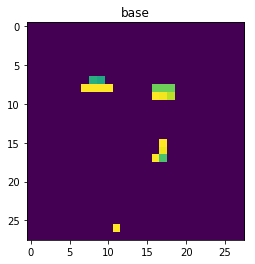

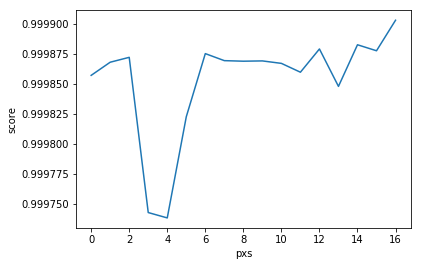

max_score 0.9999030033802248
x, y 11 26
pred [[5.21705338e-07 5.28390205e-05 1.49503263e-05 2.53603716e-06
  1.33668834e-05 8.98619581e-06 2.09657070e-07 9.99903003e-01
  2.61538776e-06 9.71406432e-07]]


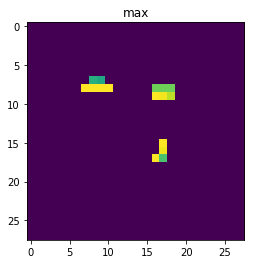

101
base_label 7
base_score 0.9999030033802248


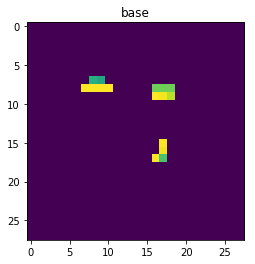

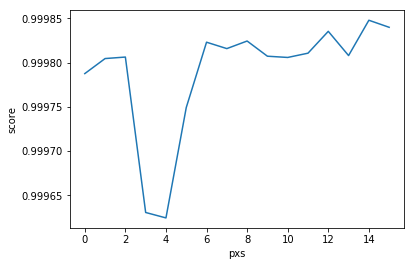

max_score 0.9998478896914955
x, y 16 17
pred [[7.26950984e-07 7.59457829e-05 3.08406705e-05 7.03961104e-06
  7.23977925e-06 2.35763679e-05 2.59417740e-07 9.99847890e-01
  5.57796626e-06 9.03762009e-07]]


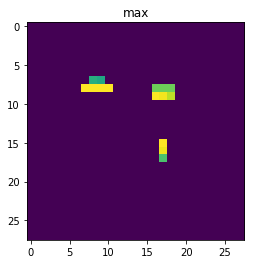

102
base_label 7
base_score 0.9998478896914955


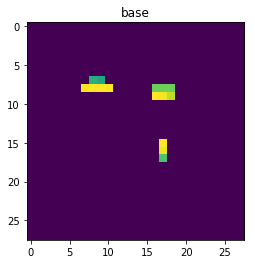

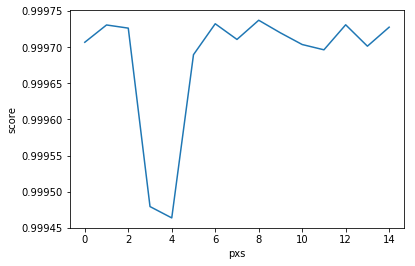

max_score 0.9997373701050905
x, y 18 8
pred [[9.91492635e-07 1.02699844e-04 5.53953432e-05 1.30106712e-05
  1.91963676e-05 5.86325952e-05 7.40736474e-07 9.99737370e-01
  1.02538810e-05 1.70896401e-06]]


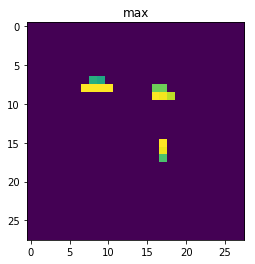

103
base_label 7
base_score 0.9997373701050905


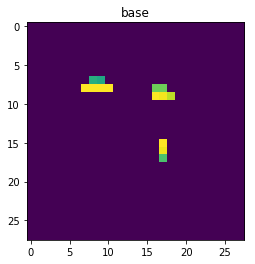

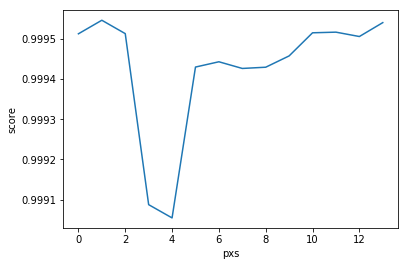

max_score 0.9995466648941401
x, y 9 7
pred [[2.41624391e-06 2.03374176e-04 8.32878351e-05 2.13794945e-05
  4.29966127e-05 7.78325334e-05 1.06812522e-06 9.99546665e-01
  1.69238197e-05 4.05626512e-06]]


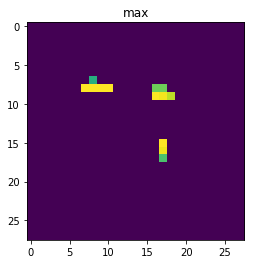

104
base_label 7
base_score 0.9995466648941401


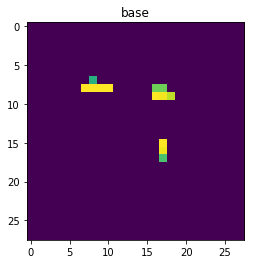

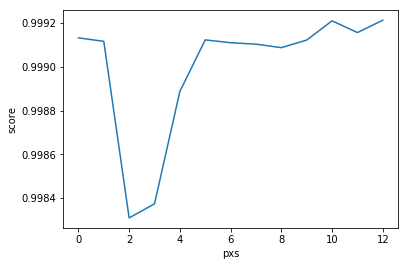

max_score 0.9992132189695718
x, y 17 17
pred [[3.73593799e-06 3.32194928e-04 1.82788404e-04 4.41756891e-05
  3.71952162e-05 1.50477412e-04 1.70627894e-06 9.99213219e-01
  3.00014241e-05 4.50574071e-06]]


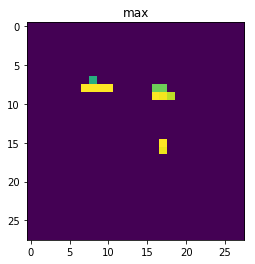

105
base_label 7
base_score 0.9992132189695718


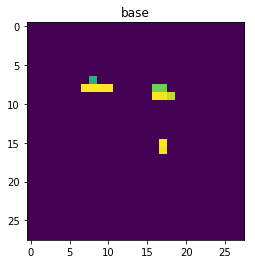

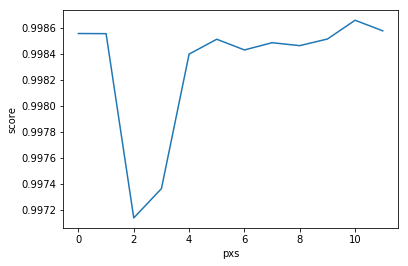

max_score 0.9986607906249063
x, y 17 15
pred [[9.01969987e-06 3.89131388e-04 4.51406964e-04 7.51020026e-05
  2.79642787e-05 3.14324310e-04 3.34509066e-06 9.98660791e-01
  6.34520983e-05 5.46354316e-06]]


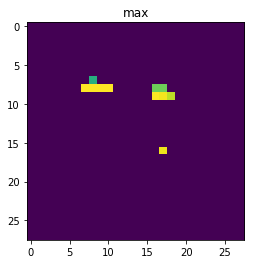

106
base_label 7
base_score 0.9986607906249063


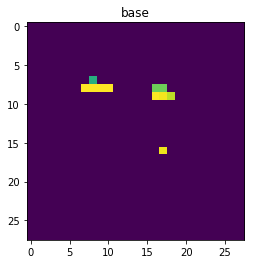

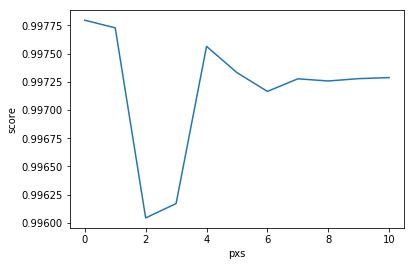

max_score 0.9977949822748775
x, y 8 7
pred [[2.43151351e-05 8.01613428e-04 7.44010673e-04 1.14231887e-04
  4.74407315e-05 3.45606532e-04 4.62652934e-06 9.97794982e-01
  1.12745532e-04 1.04272777e-05]]


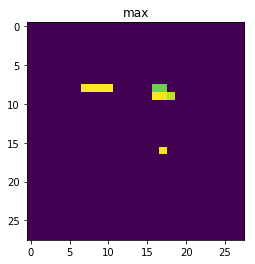

107
base_label 7
base_score 0.9977949822748775


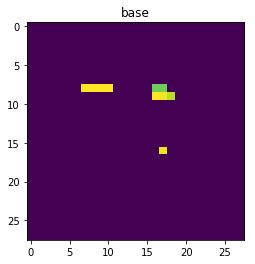

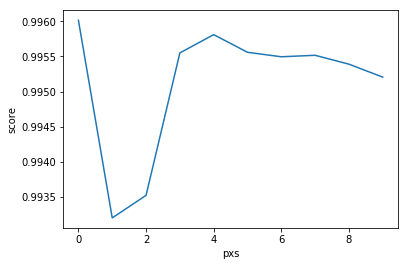

max_score 0.9960156480628836
x, y 7 8
pred [[9.35407752e-05 1.58357496e-03 9.67761988e-04 2.12737612e-04
  7.12061964e-05 8.00872422e-04 7.29193420e-06 9.96015648e-01
  2.08865078e-04 3.85009737e-05]]


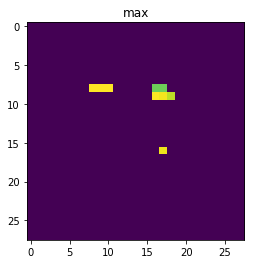

108
base_label 7
base_score 0.9960156480628836


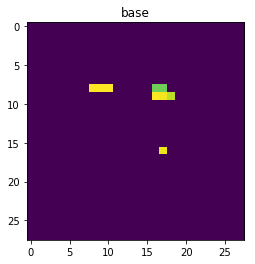

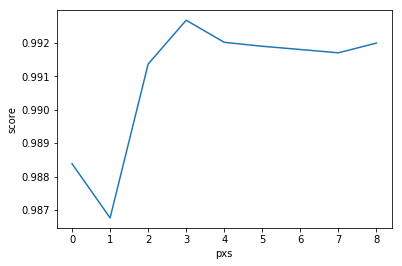

max_score 0.992678515505004
x, y 16 8
pred [[1.97350438e-04 2.14289324e-03 1.38520780e-03 5.64247604e-04
  2.29854060e-04 2.09285123e-03 3.25930405e-05 9.92678516e-01
  5.49660781e-04 1.26826297e-04]]


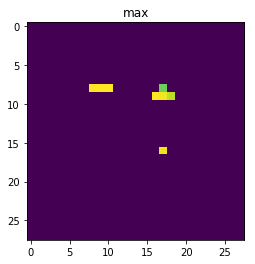

109
base_label 7
base_score 0.992678515505004


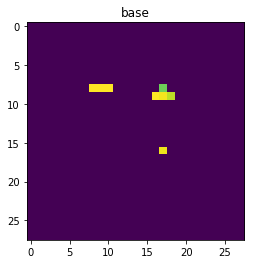

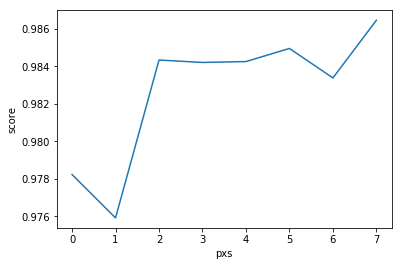

max_score 0.9864677354670884
x, y 17 16
pred [[4.48719297e-04 3.46020868e-03 3.51827577e-03 1.25937205e-03
  9.87700471e-05 3.54997851e-03 3.39335741e-05 9.86467735e-01
  1.01454389e-03 1.48462706e-04]]


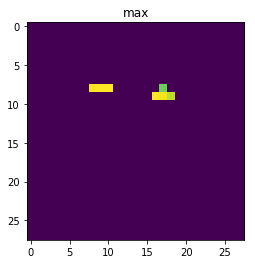

110
base_label 7
base_score 0.9864677354670884


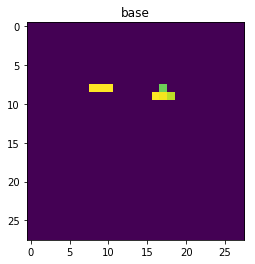

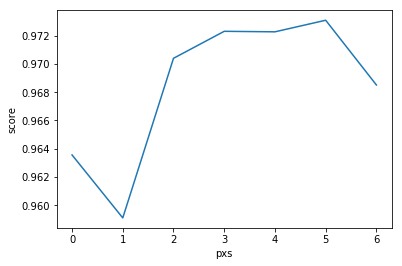

max_score 0.9730905556765302
x, y 17 9
pred [[8.81923109e-04 5.77517354e-03 6.33672326e-03 2.68597084e-03
  3.21519247e-04 8.19166989e-03 2.37608996e-04 9.73090556e-01
  2.10940244e-03 3.69453008e-04]]


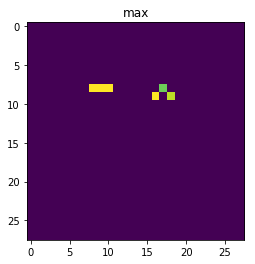

111
base_label 7
base_score 0.9730905556765302


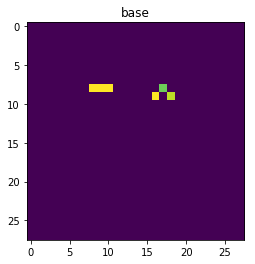

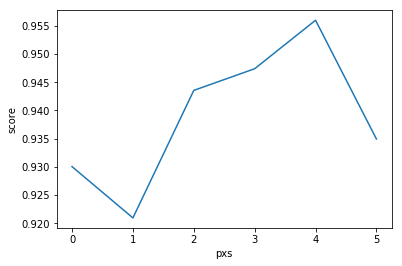

max_score 0.9560072557257325
x, y 16 9
pred [[2.13563113e-03 7.66117478e-03 1.08527815e-02 4.77609918e-03
  8.82104569e-04 1.15485277e-02 1.11683423e-03 9.56007256e-01
  4.22276444e-03 7.96826676e-04]]


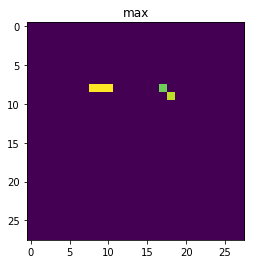

112
base_label 7
base_score 0.9560072557257325


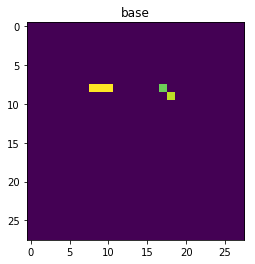

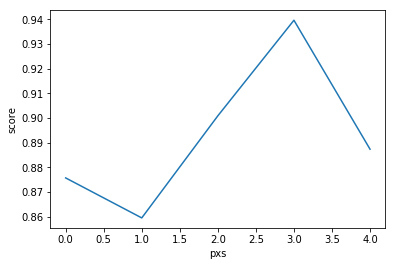

max_score 0.9396345848763951
x, y 17 8
pred [[0.00446691 0.00952276 0.01457886 0.0050223  0.00215536 0.01484468
  0.00287851 0.93963458 0.00513268 0.00176334]]


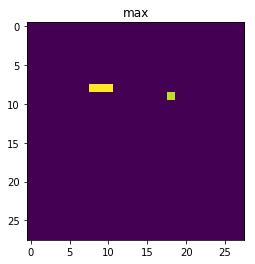

113
base_label 7
base_score 0.9396345848763951


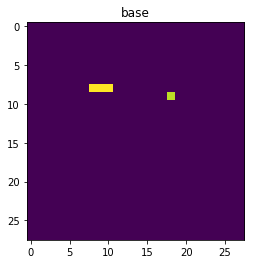

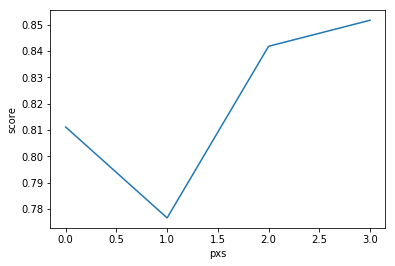

max_score 0.8517298668932207
x, y 18 9
pred [[0.00528308 0.01927843 0.02244966 0.01028867 0.00329481 0.06743091
  0.0088122  0.85172987 0.0064601  0.00497227]]


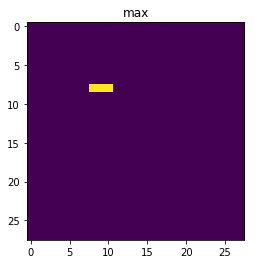

114
base_label 7
base_score 0.8517298668932207


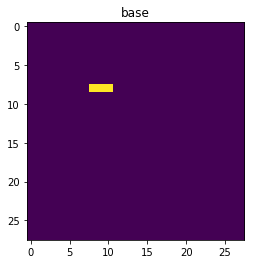

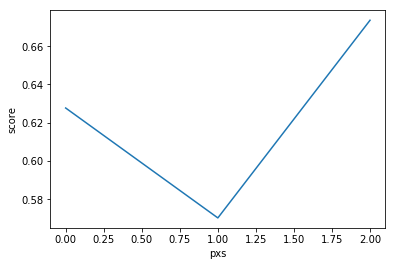

max_score 0.6735324609741516
x, y 10 8
pred [[0.01574549 0.03525105 0.04249343 0.02213842 0.01868403 0.10235621
  0.04198855 0.67353246 0.02779908 0.02001128]]


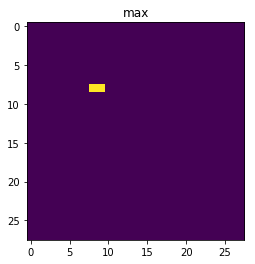

115
base_label 7
base_score 0.6735324609741516


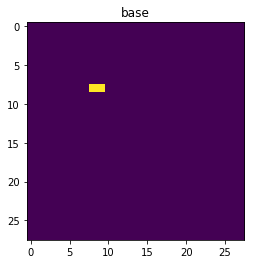

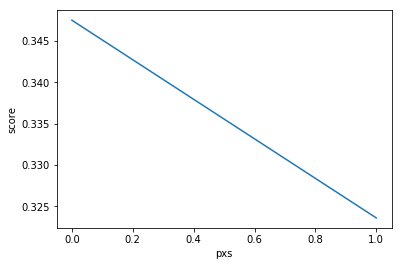

max_score 0.3475187872409493
x, y 8 8
pred [[0.04980845 0.07591782 0.08862846 0.05515143 0.05227998 0.1262821
  0.08362269 0.34751879 0.07237065 0.04841964]]


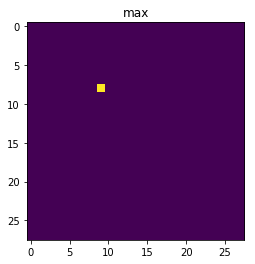

116
base_label 7
base_score 0.3475187872409493


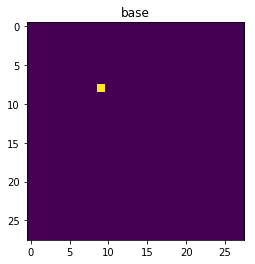

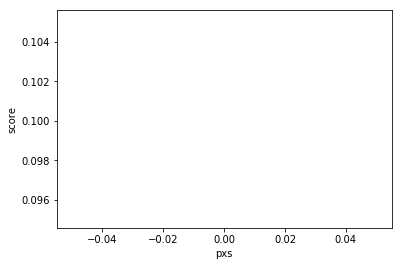

max_score 0.1000952864766323
x, y 9 8
pred [[0.09988852 0.10011072 0.09991964 0.0998616  0.10009071 0.10021778
  0.09996538 0.10009529 0.09984087 0.10000948]]


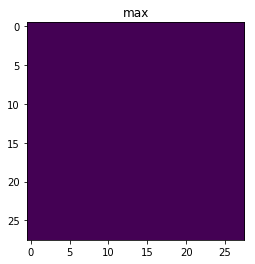

In [95]:
min_7 = find_min_tar(x_base, 7)

In [96]:
min_7

[[19, 12],
 [15, 20],
 [13, 9],
 [14, 21],
 [14, 8],
 [13, 25],
 [20, 12],
 [13, 24],
 [20, 11],
 [14, 10],
 [6, 8],
 [14, 18],
 [15, 21],
 [13, 22],
 [13, 23],
 [14, 9],
 [12, 22],
 [12, 24],
 [13, 8],
 [13, 21],
 [14, 22],
 [11, 24],
 [19, 14],
 [6, 7],
 [14, 23],
 [16, 20],
 [12, 10],
 [6, 9],
 [18, 13],
 [15, 17],
 [11, 22],
 [13, 19],
 [15, 16],
 [13, 10],
 [19, 15],
 [15, 22],
 [21, 11],
 [12, 20],
 [20, 13],
 [14, 25],
 [11, 7],
 [13, 26],
 [17, 18],
 [12, 21],
 [19, 13],
 [14, 24],
 [20, 10],
 [17, 13],
 [11, 10],
 [21, 10],
 [10, 24],
 [11, 23],
 [16, 19],
 [14, 20],
 [15, 10],
 [17, 12],
 [10, 25],
 [18, 11],
 [21, 8],
 [10, 26],
 [18, 10],
 [16, 14],
 [7, 9],
 [21, 9],
 [10, 7],
 [16, 15],
 [18, 12],
 [17, 10],
 [17, 14],
 [18, 14],
 [12, 25],
 [19, 11],
 [14, 19],
 [12, 23],
 [16, 10],
 [20, 9],
 [12, 9],
 [13, 20],
 [12, 8],
 [20, 8],
 [19, 10],
 [19, 8],
 [12, 26],
 [19, 9],
 [16, 16],
 [8, 9],
 [11, 25],
 [15, 18],
 [7, 7],
 [18, 16],
 [15, 8],
 [15, 19],
 [16, 18],
 [15